### Visualisation using the raw data

In [1]:
# Smart_grid.py
# Antonio, Mec, Vincent
# YakuzAI

from code.helpers.load_battery_data import load_battery_data
from code.helpers.load_house_data import load_house_data
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from code.classes.battery import Battery
from code.classes.house import House
from code.classes.cable import Cable
from code.classes.district import District
from code.helpers.visualize import visualize
from code.algorithm.nearest_object_x import nearest_object_x
from code.algorithm.nearest_object_rand import nearest_object_rand
from code.algorithm.nearest_battery import nearest_battery
from code.algorithm.random_alg import RandomAlgorithm
from code.helpers.draw_cables import draw_cables


#### Battery data

In [2]:
battery_data = ['data/Huizen&Batterijen/district_1/district-1_batteries.csv', 'data/Huizen&Batterijen/district_2/district-2_batteries.csv', 'data/Huizen&Batterijen/district_3/district-3_batteries.csv']

for battery in battery_data:
    print(load_battery_data(battery))

{(38, 12): 1507.0, (43, 13): 1507.0, (42, 3): 1507.0, (49, 23): 1507.0, (3, 45): 1507.0}
{(19, 20): 1508.25, (1, 36): 1508.25, (34, 49): 1508.25, (41, 21): 1508.25, (26, 22): 1508.25}
{(18, 34): 1506.75, (32, 11): 1506.75, (41, 1): 1506.75, (3, 35): 1506.75, (39, 41): 1506.75}


#### House data

In [3]:
houses_data = ['data/Huizen&Batterijen/district_1/district-1_houses.csv', 'data/Huizen&Batterijen/district_2/district-2_houses.csv', 'data/Huizen&Batterijen/district_3/district-3_houses.csv']

for house in houses_data:
    print(load_house_data(house))
    

{(34, 47): 53.97543253, (24, 22): 66.13020717, (49, 44): 39.82123377, (19, 38): 46.4333204, (22, 46): 62.43058175, (17, 11): 62.14055349, (19, 4): 52.43116675, (8, 6): 30.48448777, (9, 37): 63.19785578, (16, 38): 65.00367928, (20, 11): 40.20336825, (19, 12): 53.03976583, (33, 0): 39.13247939, (33, 7): 39.45690812, (21, 37): 53.84443114, (37, 28): 60.40913294, (2, 8): 27.78076375, (23, 48): 57.77286486, (28, 23): 38.72179636, (27, 22): 29.92408755, (47, 6): 41.78571625, (38, 22): 59.91115918, (47, 40): 71.42208448, (23, 1): 37.23961036, (18, 37): 70.21473166, (30, 37): 61.05026554, (4, 33): 38.13617191, (16, 48): 29.83002147, (12, 5): 74.15296092, (31, 41): 68.6532457, (50, 35): 54.25835415, (9, 48): 41.7880369, (22, 10): 72.88165705, (26, 30): 62.0133643, (15, 44): 53.08761347, (5, 15): 52.08494864, (21, 50): 38.71047582, (30, 12): 66.05341632, (21, 29): 45.33453242, (37, 23): 51.94608562, (27, 3): 57.11814462, (23, 10): 29.34726889, (13, 27): 37.28002017, (48, 4): 58.90934923, (20, 14

### Visualisation using the classes and functions

District 1 houses

In [4]:
district1_houses = 'data/Huizen&Batterijen/district_1/district-1_houses.csv'

houses = []
houses_data = load_house_data(district1_houses)

for house in houses_data:
    houses.append(House(house[0], house[1], houses_data[house]))

for house in houses:
    print(house.x, house.y, house.maxoutput)


34 47 53.97543253
24 22 66.13020717
49 44 39.82123377
19 38 46.4333204
22 46 62.43058175
17 11 62.14055349
19 4 52.43116675
8 6 30.48448777
9 37 63.19785578
16 38 65.00367928
20 11 40.20336825
19 12 53.03976583
33 0 39.13247939
33 7 39.45690812
21 37 53.84443114
37 28 60.40913294
2 8 27.78076375
23 48 57.77286486
28 23 38.72179636
27 22 29.92408755
47 6 41.78571625
38 22 59.91115918
47 40 71.42208448
23 1 37.23961036
18 37 70.21473166
30 37 61.05026554
4 33 38.13617191
16 48 29.83002147
12 5 74.15296092
31 41 68.6532457
50 35 54.25835415
9 48 41.7880369
22 10 72.88165705
26 30 62.0133643
15 44 53.08761347
5 15 52.08494864
21 50 38.71047582
30 12 66.05341632
21 29 45.33453242
37 23 51.94608562
27 3 57.11814462
23 10 29.34726889
13 27 37.28002017
48 4 58.90934923
20 14 45.14508246
11 4 44.75870431
43 32 46.63929091
2 50 29.93133051
30 2 60.7690834
28 37 55.74063546
41 36 60.96696147
4 3 45.9393011
15 4 70.02856894
37 47 26.27681146
8 3 31.03872389
30 4 29.51140333
11 10 63.87594515
4 38 

District 1 batteries

In [5]:
district1_batteries = 'data/Huizen&Batterijen/district_1/district-1_batteries.csv'

batteries = []
batteries_data = load_battery_data(district1_batteries)

for battery in batteries_data:
    batteries.append(Battery(battery[0], battery[1], batteries_data[battery]))

for battery in batteries:
    print(battery.x, battery.y, battery.max_capacity)



38 12 1507.0
43 13 1507.0
42 3 1507.0
49 23 1507.0
3 45 1507.0


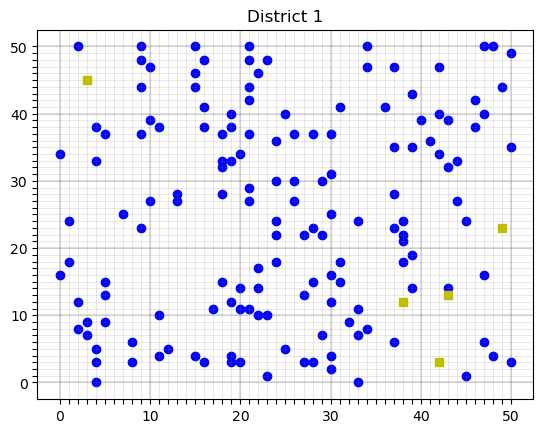

In [6]:
# Load in the data
district1_houses = 'data/Huizen&Batterijen/district_1/district-1_houses.csv'
district1_batteries = 'data/Huizen&Batterijen/district_1/district-1_batteries.csv'


# Create empty list for houses
houses = []
houses_data = load_house_data(district1_houses)

# Set al the information from the houses in the list
for house in houses_data:
    houses.append(House(house[0], house[1], houses_data[house]))

x_house = []
y_house = []

for house in houses:
    x_house.append(house.x)
    y_house.append(house.y)


# Create empty list for batteries and load in the data
batteries = []
batteries_data = load_battery_data(district1_batteries)

for battery in batteries_data:
    batteries.append(Battery(battery[0], battery[1], batteries_data[battery]))

# Load in the data for the batteries and add them to a list
x_battery = []
y_battery = []

for battery in batteries:
    x_battery.append(battery.x)
    y_battery.append(battery.y)

# Create a 50x50 grid
fig, ax = plt.subplots()
ax.set_xticks(np.arange(0, 51, 1))
ax.set_yticks(np.arange(0, 51, 1))

# The lines are opague and grey
ax.grid(linestyle='-', linewidth='0.5', alpha=0.25, color='grey', zorder = 0)


# Every 10th line is bold
for i in range(0, 51, 10):
    ax.axvline(x=i, color='grey', linestyle='-', linewidth = 1.5, alpha=0.25, zorder = 0)
    ax.axhline(y=i, color='grey', linestyle='-', linewidth = 1.5, alpha = 0.25, zorder = 0)
    
# Only index every 10th line
ax.set_xticklabels([str(i) if i % 10 == 0 else '' for i in np.arange(0, 51, 1)])
ax.set_yticklabels([str(i) if i % 10 == 0 else '' for i in np.arange(0, 51, 1)])

# plot the houses and batteries
ax.scatter(x_house, y_house, c='b', zorder = 1)
ax.scatter(x_battery, y_battery, c='y', marker='s', zorder = 2)

# Set the titlle
plt.title('District 1')

# Show de plot
plt.show()


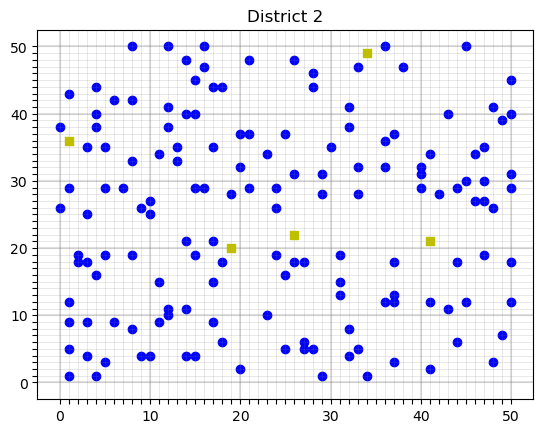

In [7]:
# Load in the data
district2_houses = 'data/Huizen&Batterijen/district_2/district-2_houses.csv'
district2_batteries = 'data/Huizen&Batterijen/district_2/district-2_batteries.csv'


# Create empty list for houses
houses = []
houses_data = load_house_data(district2_houses)

# Set al the information from the houses in the list
for house in houses_data:
    houses.append(House(house[0], house[1], houses_data[house]))

x_house = []
y_house = []

for house in houses:
    x_house.append(house.x)
    y_house.append(house.y)


# Create empty list for batteries and load in the data
batteries = []
batteries_data = load_battery_data(district2_batteries)

for battery in batteries_data:
    batteries.append(Battery(battery[0], battery[1], batteries_data[battery]))

# Load in the data for the batteries and add them to a list
x_battery = []
y_battery = []

for battery in batteries:
    x_battery.append(battery.x)
    y_battery.append(battery.y)

# Create a 50x50 grid
fig, ax = plt.subplots()
ax.set_xticks(np.arange(0, 51, 1))
ax.set_yticks(np.arange(0, 51, 1))

# The lines are opague and grey
ax.grid(linestyle='-', linewidth='0.5', alpha=0.25, color='grey', zorder = 0)


# Every 10th line is bold
for i in range(0, 51, 10):
    ax.axvline(x=i, color='grey', linestyle='-', linewidth = 1.5, alpha=0.25, zorder = 0)
    ax.axhline(y=i, color='grey', linestyle='-', linewidth = 1.5, alpha = 0.25, zorder = 0)
    
# Only index every 10th line
ax.set_xticklabels([str(i) if i % 10 == 0 else '' for i in np.arange(0, 51, 1)])
ax.set_yticklabels([str(i) if i % 10 == 0 else '' for i in np.arange(0, 51, 1)])

# plot the houses and batteries
ax.scatter(x_house, y_house, c='b', zorder = 1)
ax.scatter(x_battery, y_battery, c='y', marker='s', zorder = 2)

# Set the titlle
plt.title('District 2')

# Show de plot
plt.show()


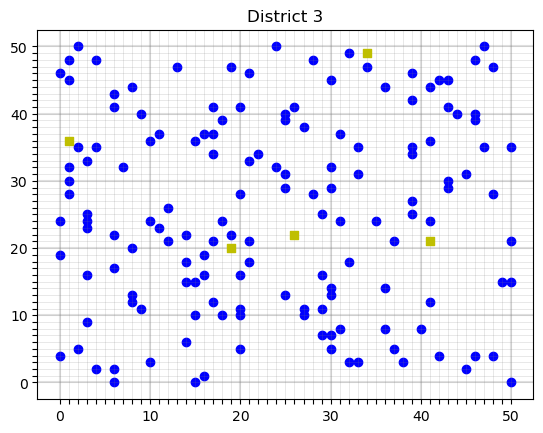

In [8]:

# Load in the data
district3_houses = 'data/Huizen&Batterijen/district_3/district-3_houses.csv'
district3_batteries = 'data/Huizen&Batterijen/district_3/district-3_batteries.csv'


# Create empty list for houses
houses = []
houses_data = load_house_data(district3_houses)

# Set al the information from the houses in the list
for house in houses_data:
    houses.append(House(house[0], house[1], houses_data[house]))

x_house = []
y_house = []

for house in houses:
    x_house.append(house.x)
    y_house.append(house.y)


# Create empty list for batteries and load in the data
batteries = []
batteries_data = load_battery_data(district2_batteries)

for battery in batteries_data:
    batteries.append(Battery(battery[0], battery[1], batteries_data[battery]))

# Load in the data for the batteries and add them to a list
x_battery = []
y_battery = []

for battery in batteries:
    x_battery.append(battery.x)
    y_battery.append(battery.y)

# Create a 50x50 grid
fig, ax = plt.subplots()
ax.set_xticks(np.arange(0, 51, 1))
ax.set_yticks(np.arange(0, 51, 1))

# The lines are opague and grey
ax.grid(linestyle='-', linewidth='0.5', alpha=0.25, color='grey', zorder = 0)


# Every 10th line is bold
for i in range(0, 51, 10):
    ax.axvline(x=i, color='grey', linestyle='-', linewidth = 1.5, alpha=0.25, zorder = 0)
    ax.axhline(y=i, color='grey', linestyle='-', linewidth = 1.5, alpha = 0.25, zorder = 0)
    
# Only index every 10th line
ax.set_xticklabels([str(i) if i % 10 == 0 else '' for i in np.arange(0, 51, 1)])
ax.set_yticklabels([str(i) if i % 10 == 0 else '' for i in np.arange(0, 51, 1)])

# plot the houses and batteries
ax.scatter(x_house, y_house, c='b', zorder = 1)
ax.scatter(x_battery, y_battery, c='y', marker='s', zorder = 2)

# Set the titlle
plt.title('District 3')

# Show de plot
plt.show()


### Testing the algorithms for setting the cables
#### Random algorithm

In [9]:
### Drawing cables for all districts
districts_houses = ['simulation_results/nearest_object_rand_lowest_cost_order.csv', 'data/Huizen&Batterijen/district_2/district-2_houses.csv', 'data/Huizen&Batterijen/district_3/district-3_houses.csv']
districts_batteries = ['data/Huizen&Batterijen/district_1/district-1_batteries.csv', 'data/Huizen&Batterijen/district_2/district-2_batteries.csv', 'data/Huizen&Batterijen/district_3/district-3_batteries.csv']

# for each district
for i in range(0, 3):
    print(f'District {i+1}')
    experiment_instance = District(districts_houses[i], districts_batteries[i])

    # Apply the Greedy algorithm to connect houses to batteries
    random_battery_instance = RandomAlgorithm(experiment_instance)
    random_battery_instance.connect_houses_to_batteries()
    
    visualize(experiment_instance, i)
    # draw_cables(experiment_instance)



    

District 1


FileNotFoundError: [Errno 2] No such file or directory: 'simulation_results/nearest_object_rand_lowest_cost_order.csv'

##### Below you'll find visualisations of the results of the nearest battery
the algortihm is favouring the closest battery by x first and then taking steps in the y direction.

District 1


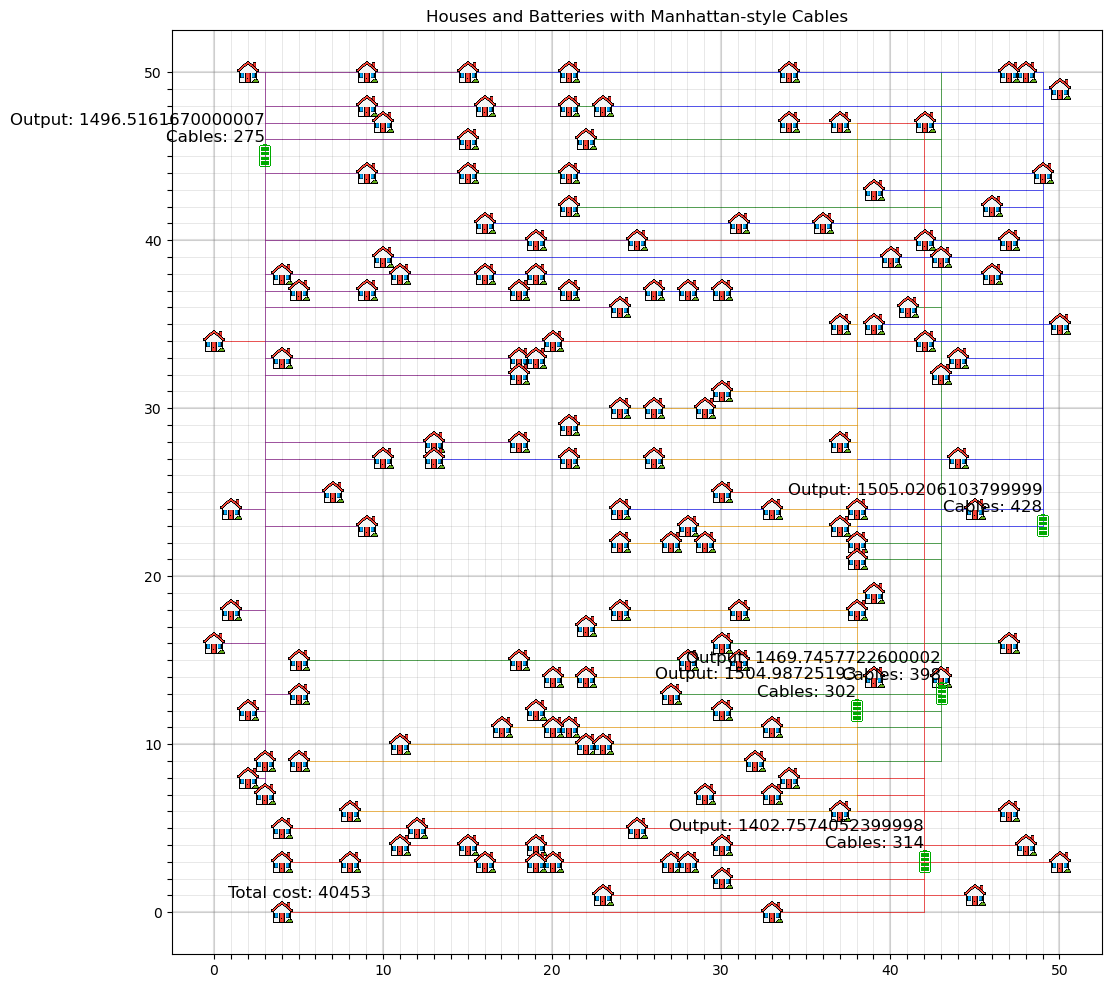

District 2


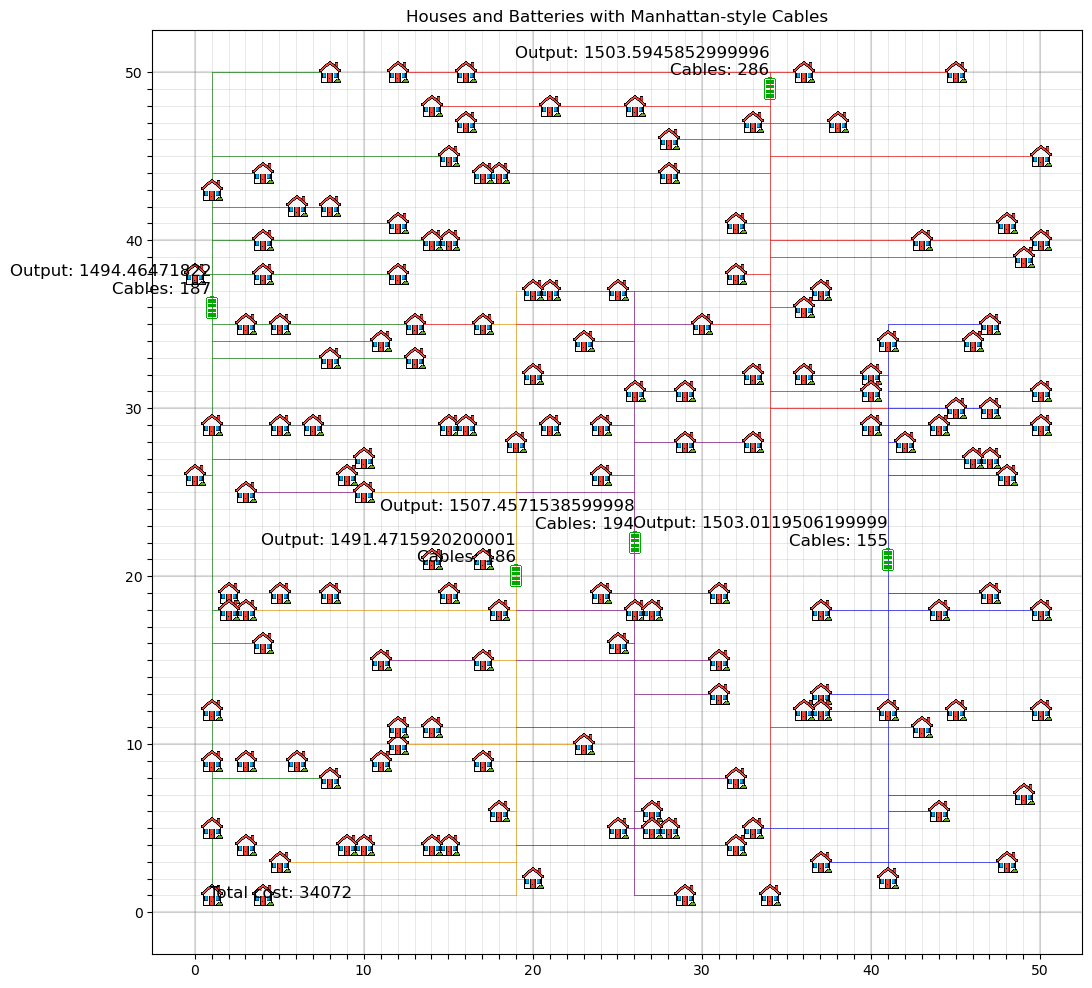

District 3


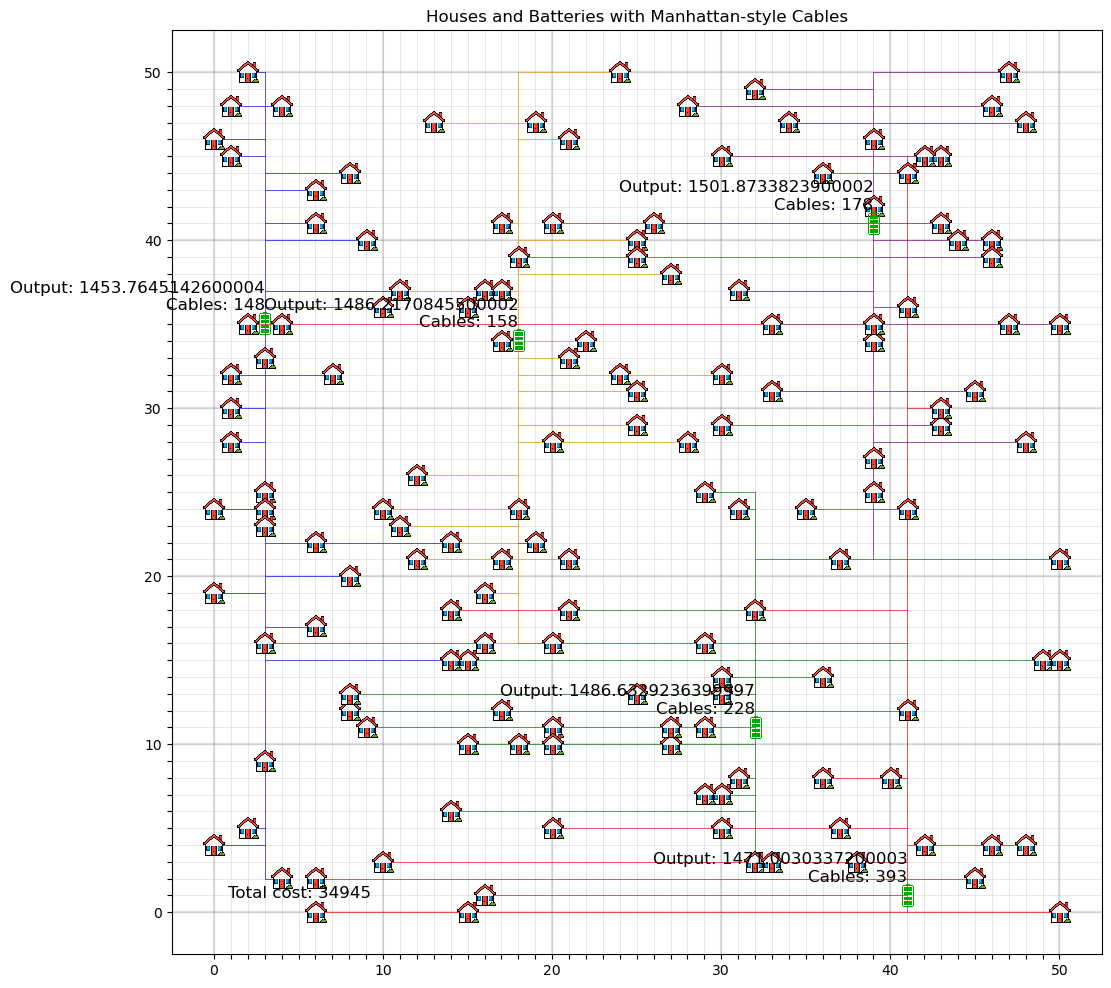

In [10]:
### Drawing cables for all districts
districts_houses = ['simulation_results/nearest_battery_lowest_cost_order.csv', 'data/Huizen&Batterijen/district_2/district-2_houses.csv', 'data/Huizen&Batterijen/district_3/district-3_houses.csv']
districts_batteries = ['data/Huizen&Batterijen/district_1/district-1_batteries.csv', 'data/Huizen&Batterijen/district_2/district-2_batteries.csv', 'data/Huizen&Batterijen/district_3/district-3_batteries.csv']

# for each district
for i in range(0, 3):
    print(f'District {i+1}')
    experiment_instance = District(districts_houses[i], districts_batteries[i])

    # Apply the Greedy algorithm to connect houses to batteries
    nearest_battery_instance = nearest_battery(experiment_instance)
    nearest_battery_instance.connect_houses_to_batteries()
    
    visualize(experiment_instance, i)
    # draw_cables(experiment_instance)

### Testing the nearest_object
#### Nearest_object_x algorithm
##### This algorithm first plots the x axis then the y axis


District 1


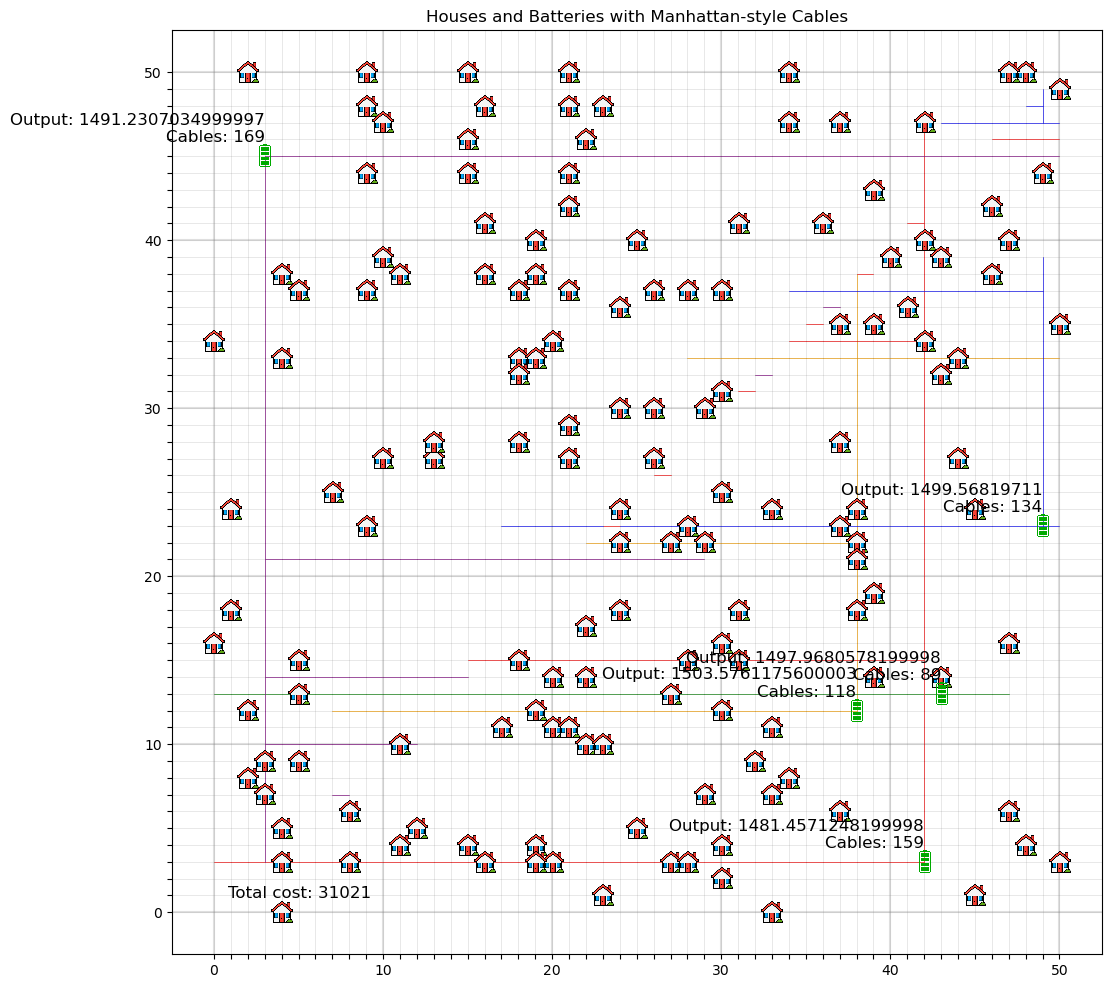

District 2


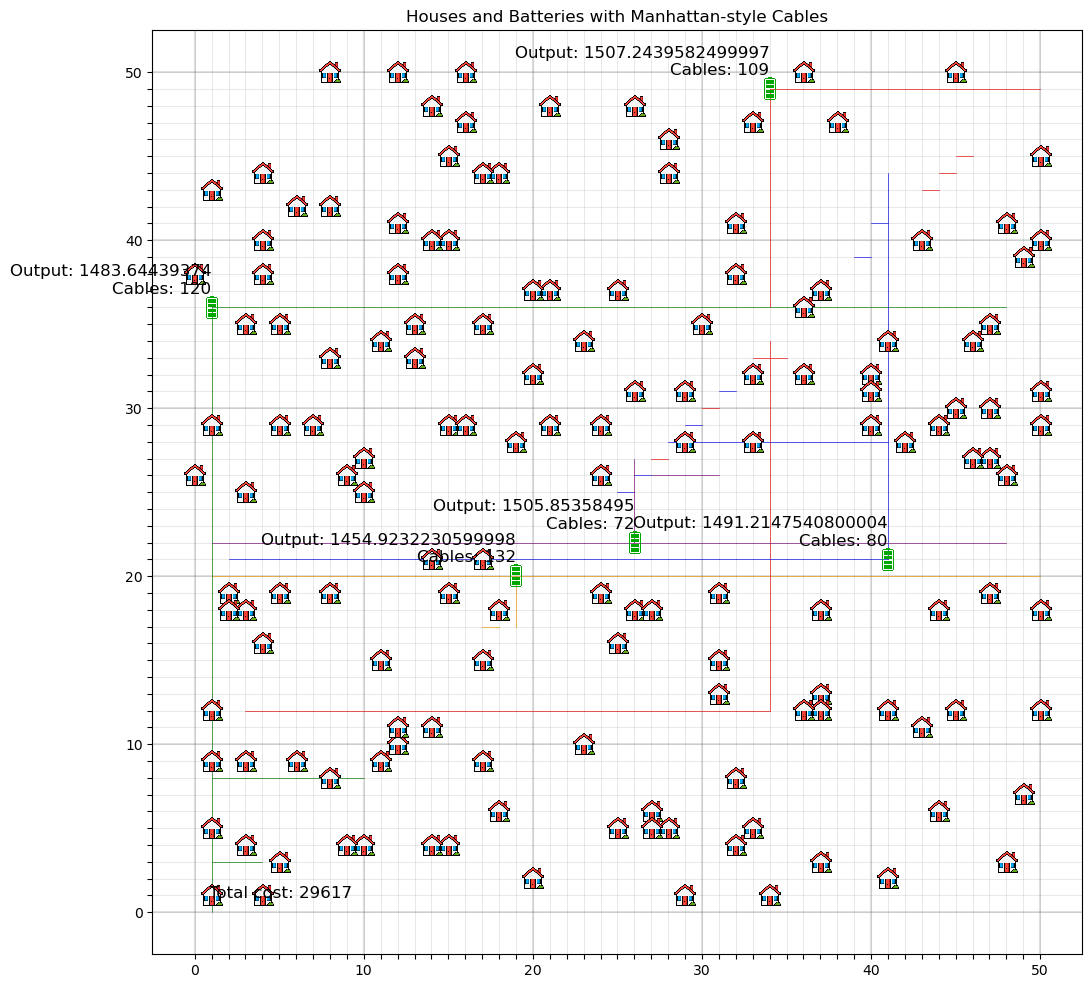

District 3


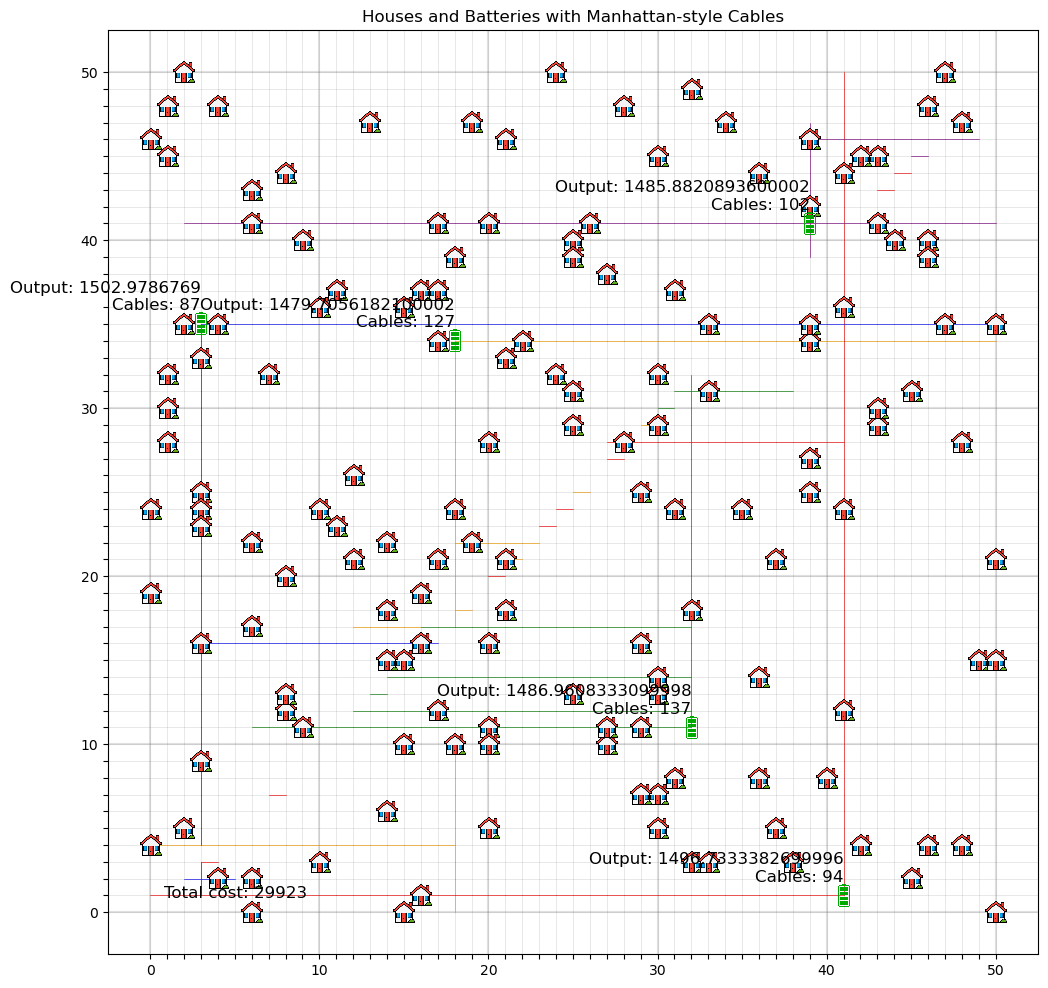

In [11]:
### Drawing cables for all districts
districts_houses = ['data/Huizen&Batterijen/district_1/district-1_houses.csv', 'data/Huizen&Batterijen/district_2/district-2_houses.csv', 'data/Huizen&Batterijen/district_3/district-3_houses.csv']
districts_batteries = ['data/Huizen&Batterijen/district_1/district-1_batteries.csv', 'data/Huizen&Batterijen/district_2/district-2_batteries.csv', 'data/Huizen&Batterijen/district_3/district-3_batteries.csv']

# for each district
for i in range(0, 3):
    print(f'District {i+1}')
    experiment_instance = District(districts_houses[i], districts_batteries[i])

    # Apply the Greedy algorithm to connect houses to batteries
    nearest_object_instance = nearest_object_x(experiment_instance)
    nearest_object_instance.connect_houses_to_batteries()
    
    visualize(experiment_instance, i)
    # draw_cables(experiment_instance)


### Testing the nearest_object
#### Nearest_object_x algorithm
##### This algorithm has a 50/50 chance per house of plotting x or y


District 1


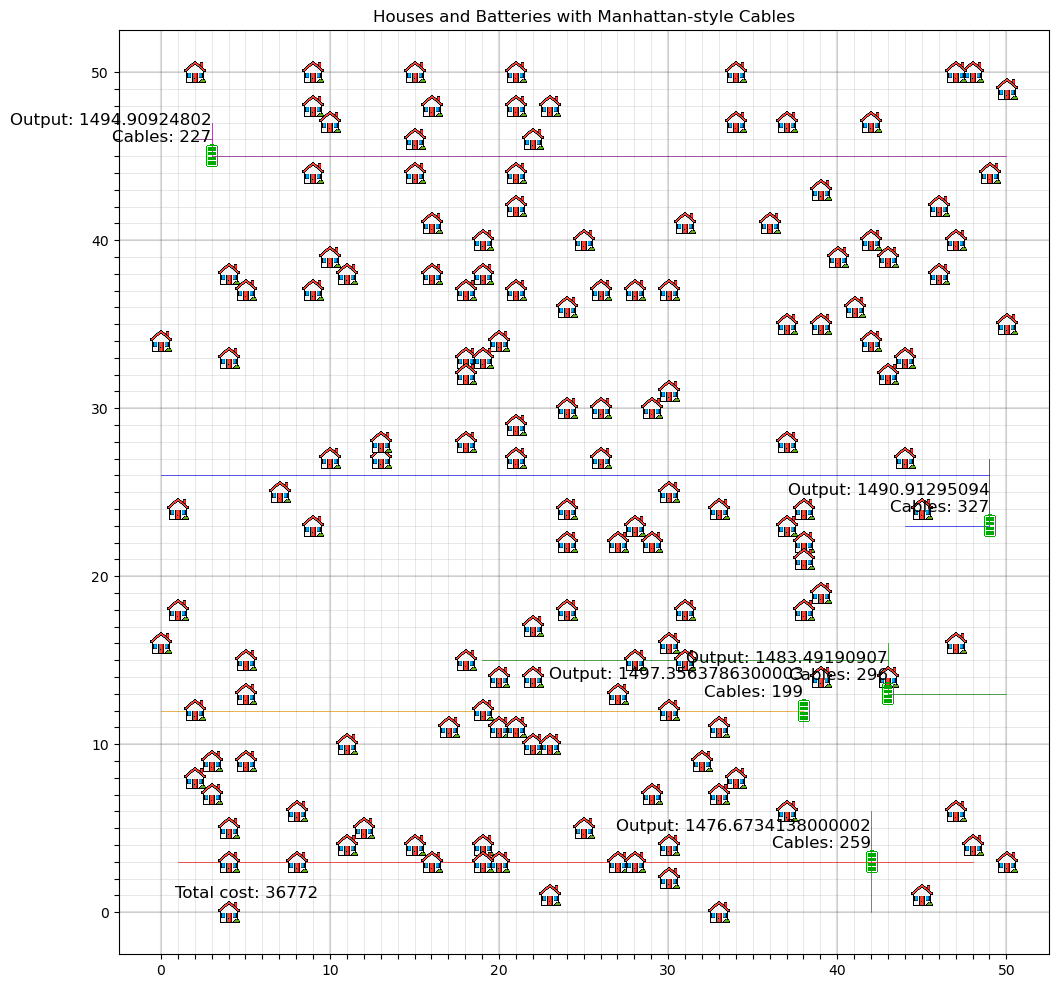

District 2


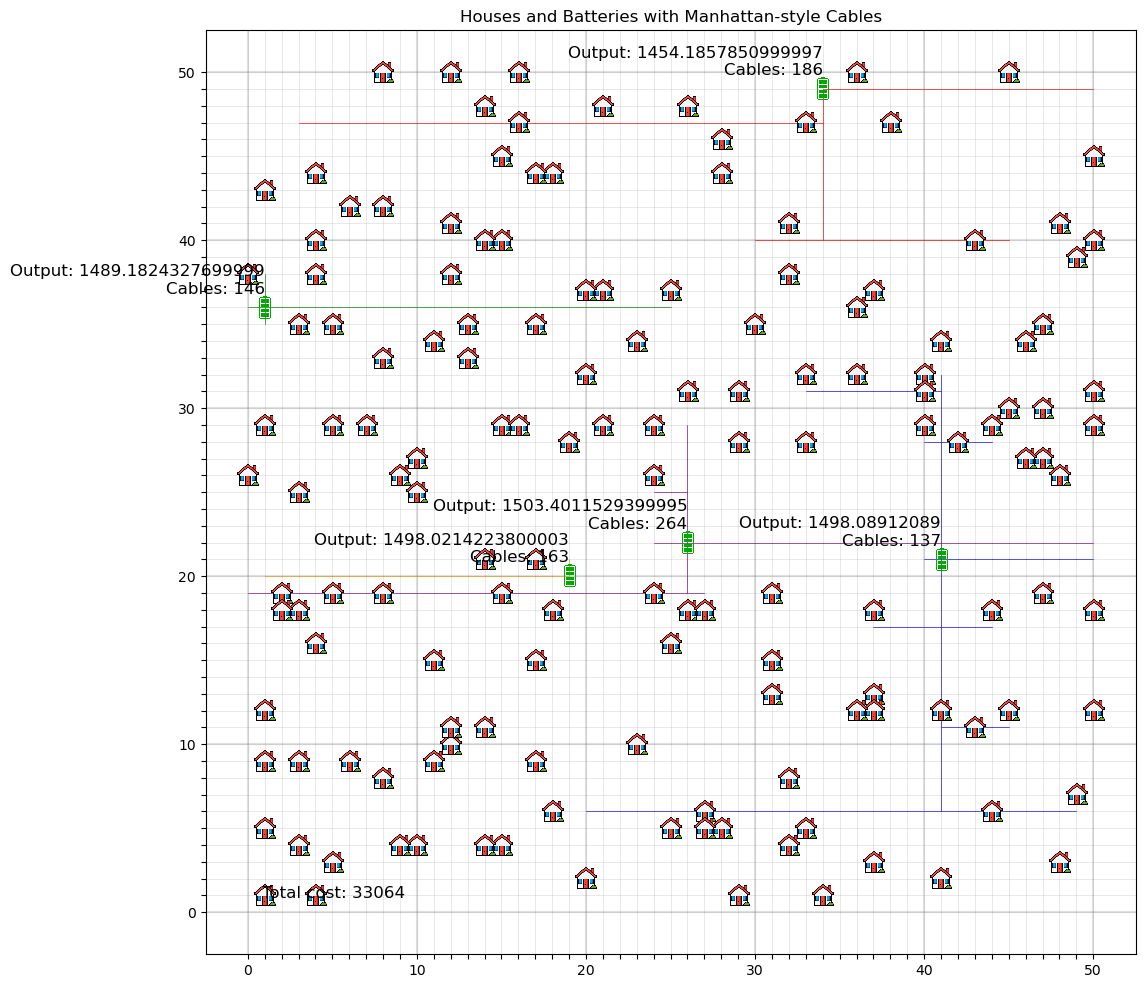

District 3


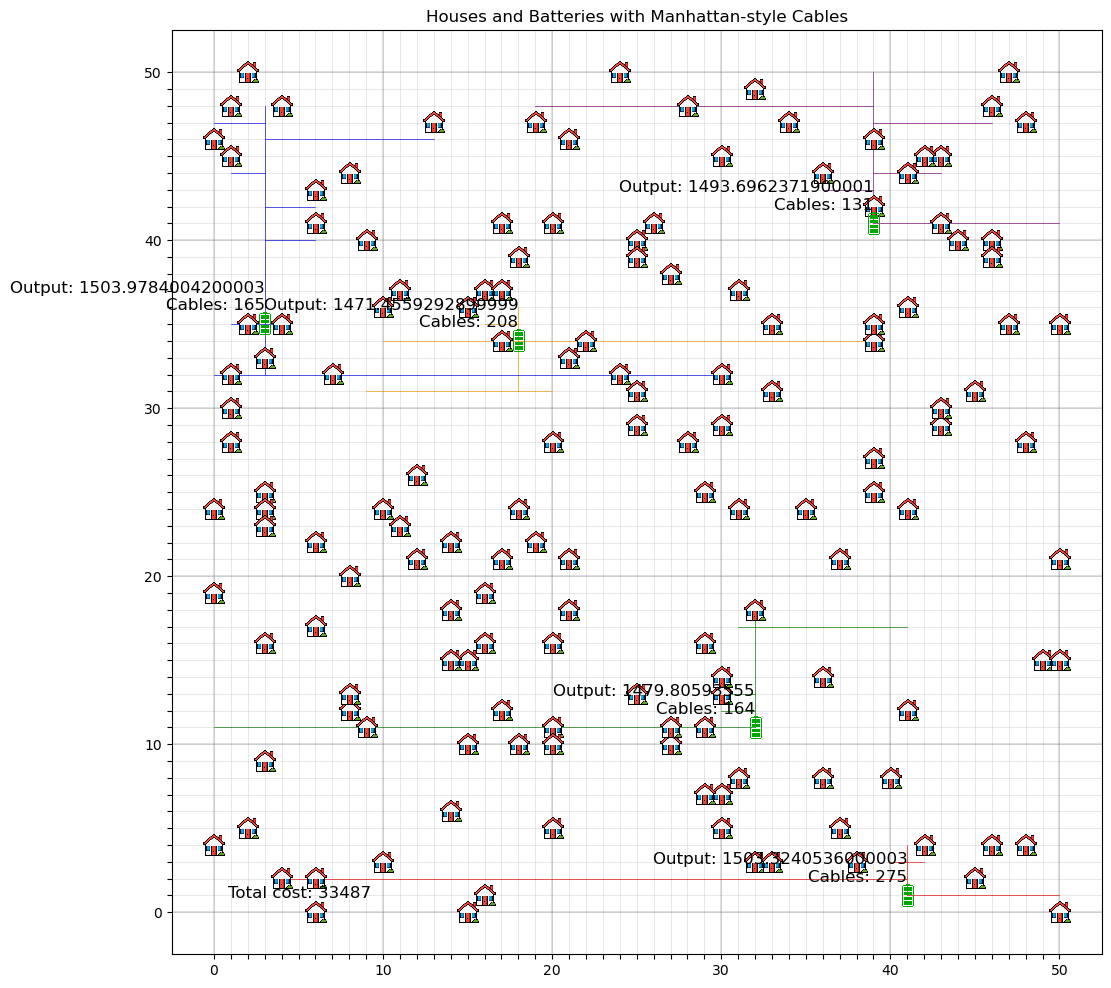

In [12]:
### Drawing cables for all districts
districts_houses = ['data/Huizen&Batterijen/district_1/district-1_houses.csv', 'data/Huizen&Batterijen/district_2/district-2_houses.csv', 'data/Huizen&Batterijen/district_3/district-3_houses.csv']
districts_batteries = ['data/Huizen&Batterijen/district_1/district-1_batteries.csv', 'data/Huizen&Batterijen/district_2/district-2_batteries.csv', 'data/Huizen&Batterijen/district_3/district-3_batteries.csv']

# for each district
for i in range(0, 3):
    print(f'District {i+1}')
    experiment_instance = District(districts_houses[i], districts_batteries[i])

    # Apply the Greedy algorithm to connect houses to batteries
    nearest_object_instance = nearest_object_rand(experiment_instance)
    nearest_object_instance.connect_houses_to_batteries()
    
    visualize(experiment_instance, i)
    # draw_cables(experiment_instance)


## Test cell to test if we van recreate the lowest costs in a plot

RANDOM ALGORITM BEST RESULTS
NEAREST BATTERY BEST RESULTS
NEAREST OBJECT X BEST RESULTS
NEAREST OBJECT Y BEST RESULTS
NEAREST OBJECT RAND BEST RESULTS
DIJCKSTRA BEST RESULTS


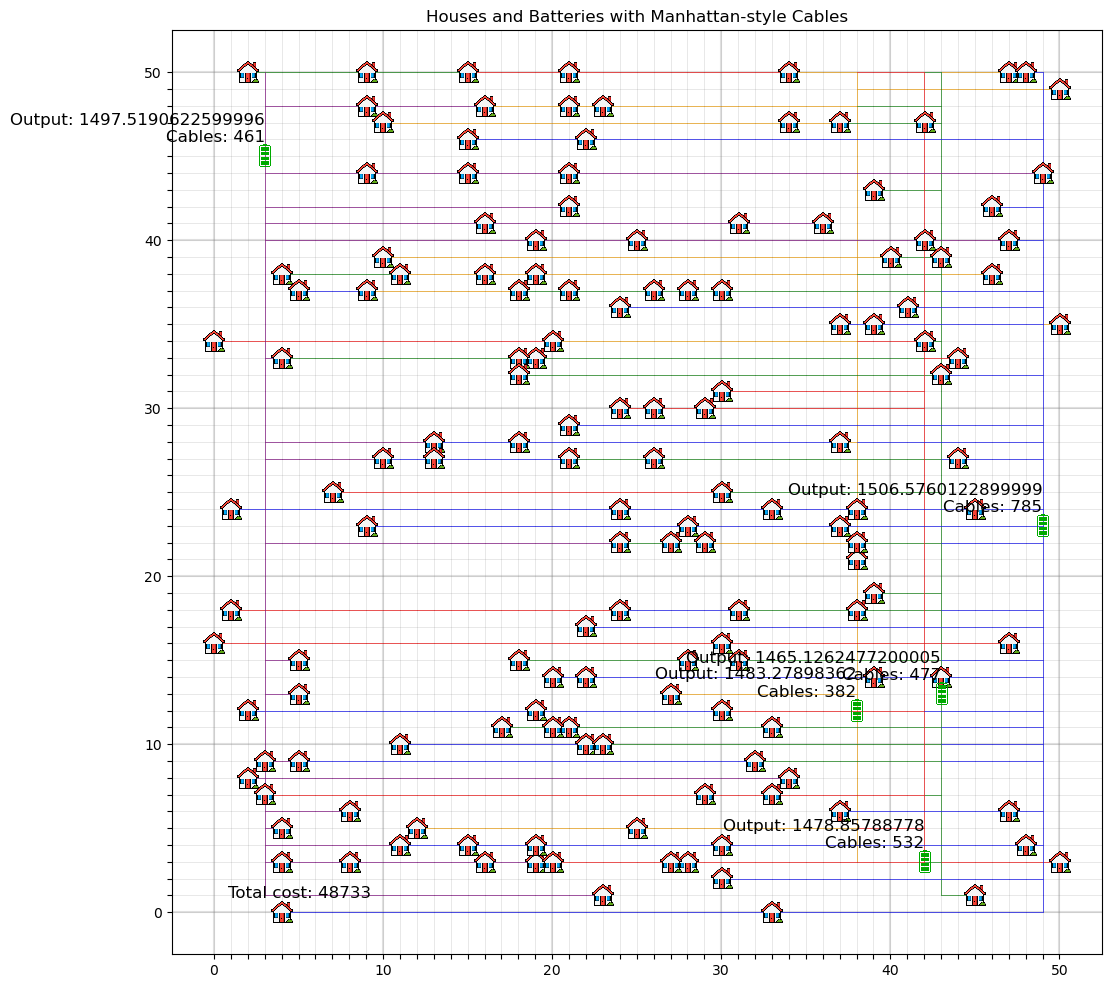

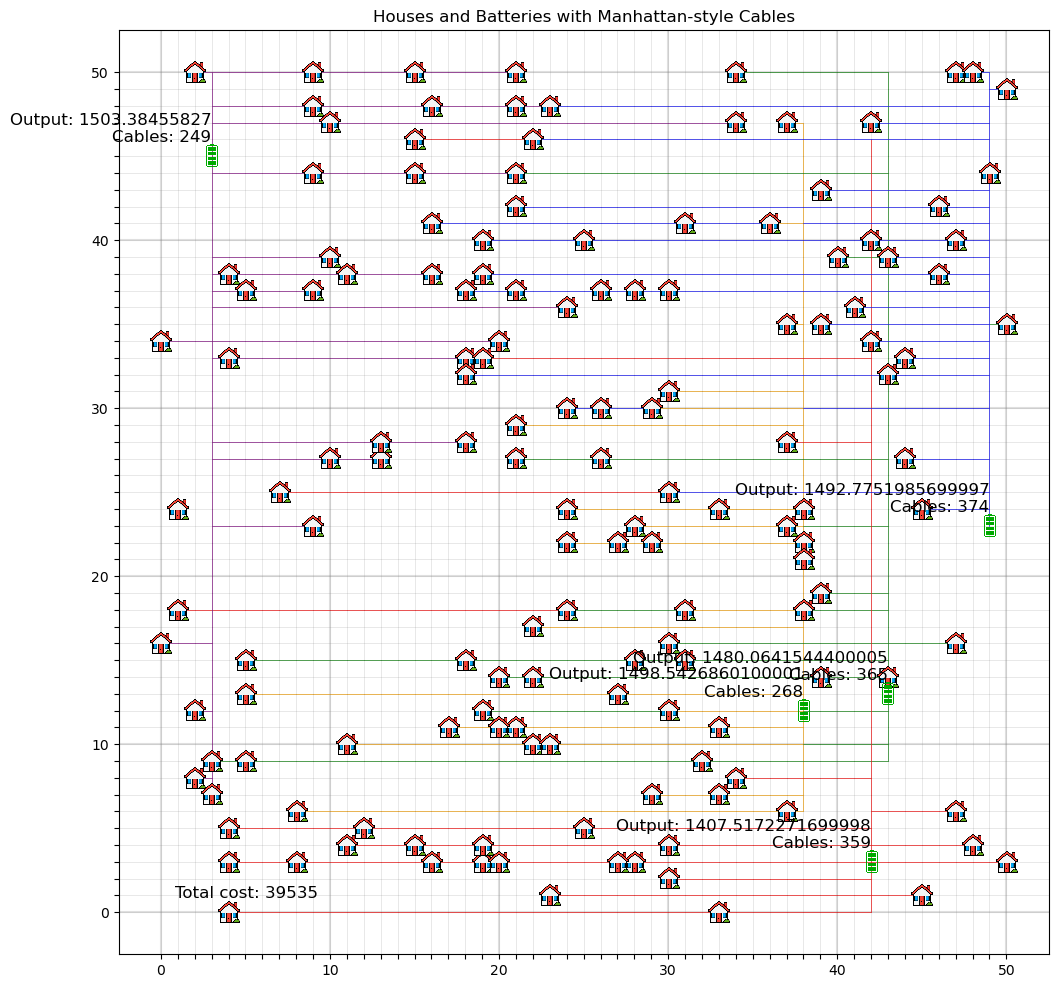

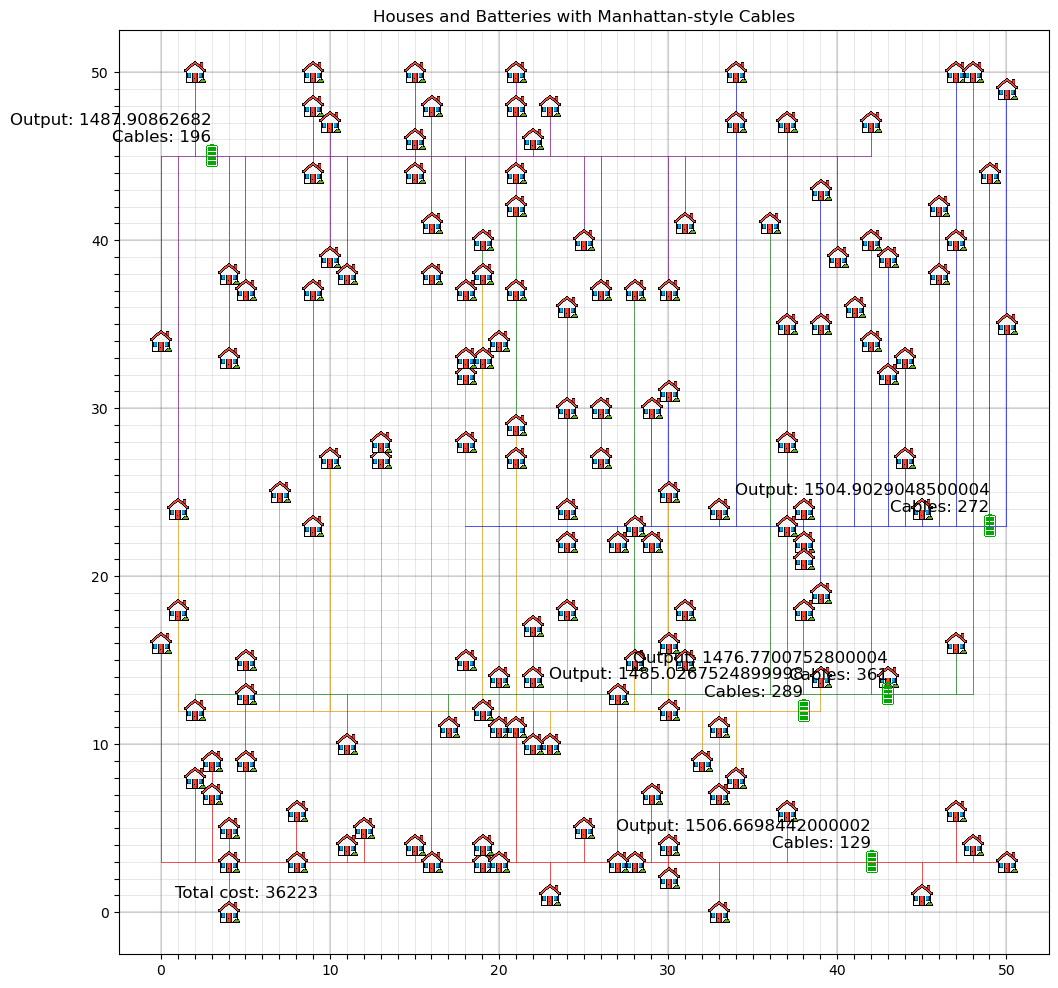

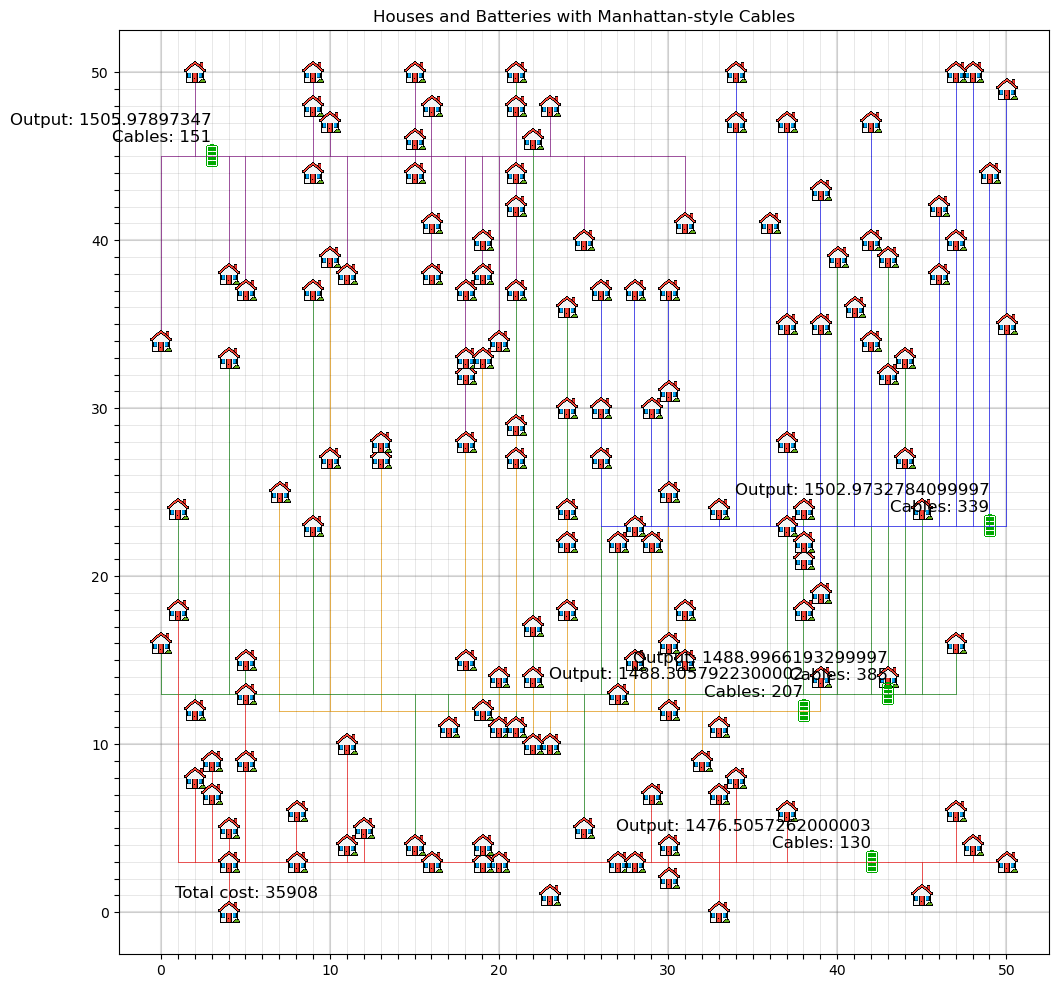

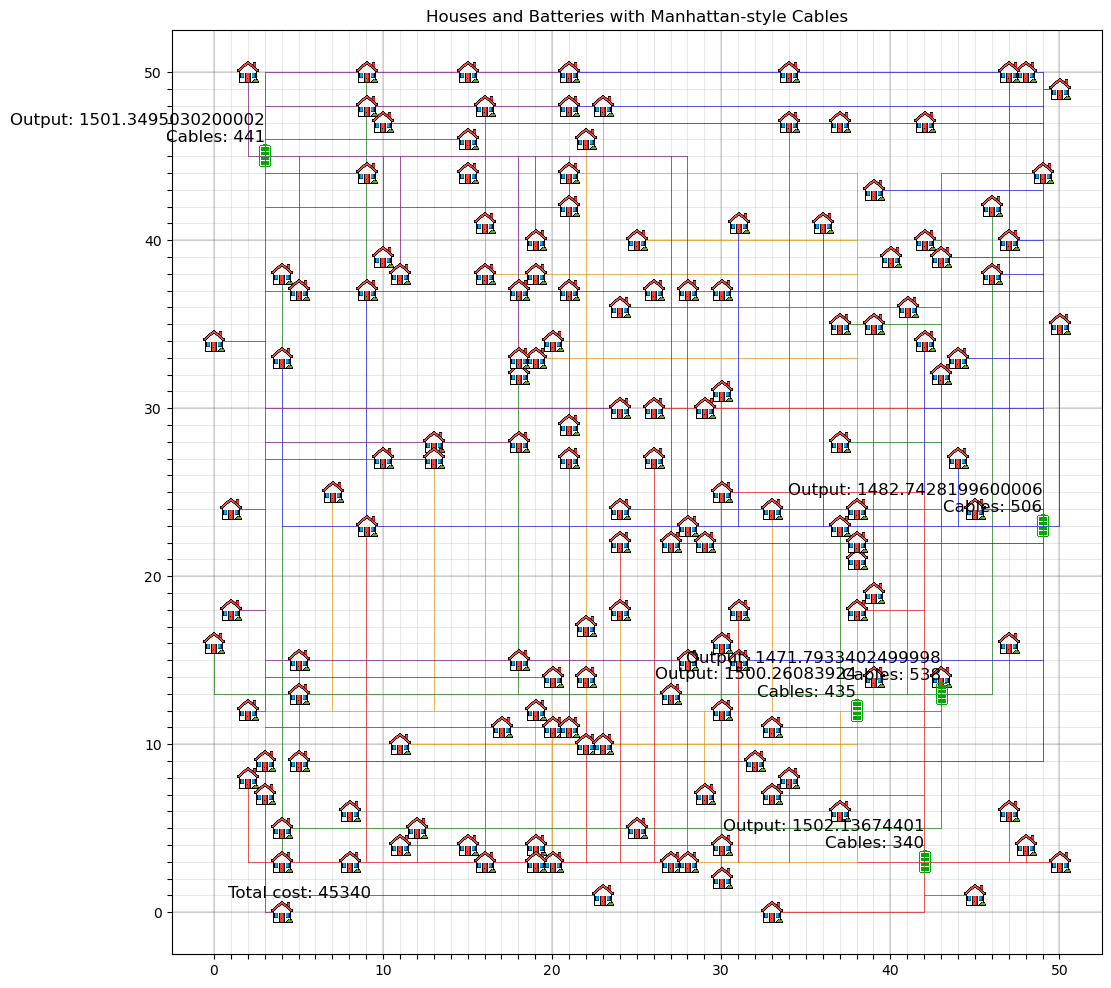

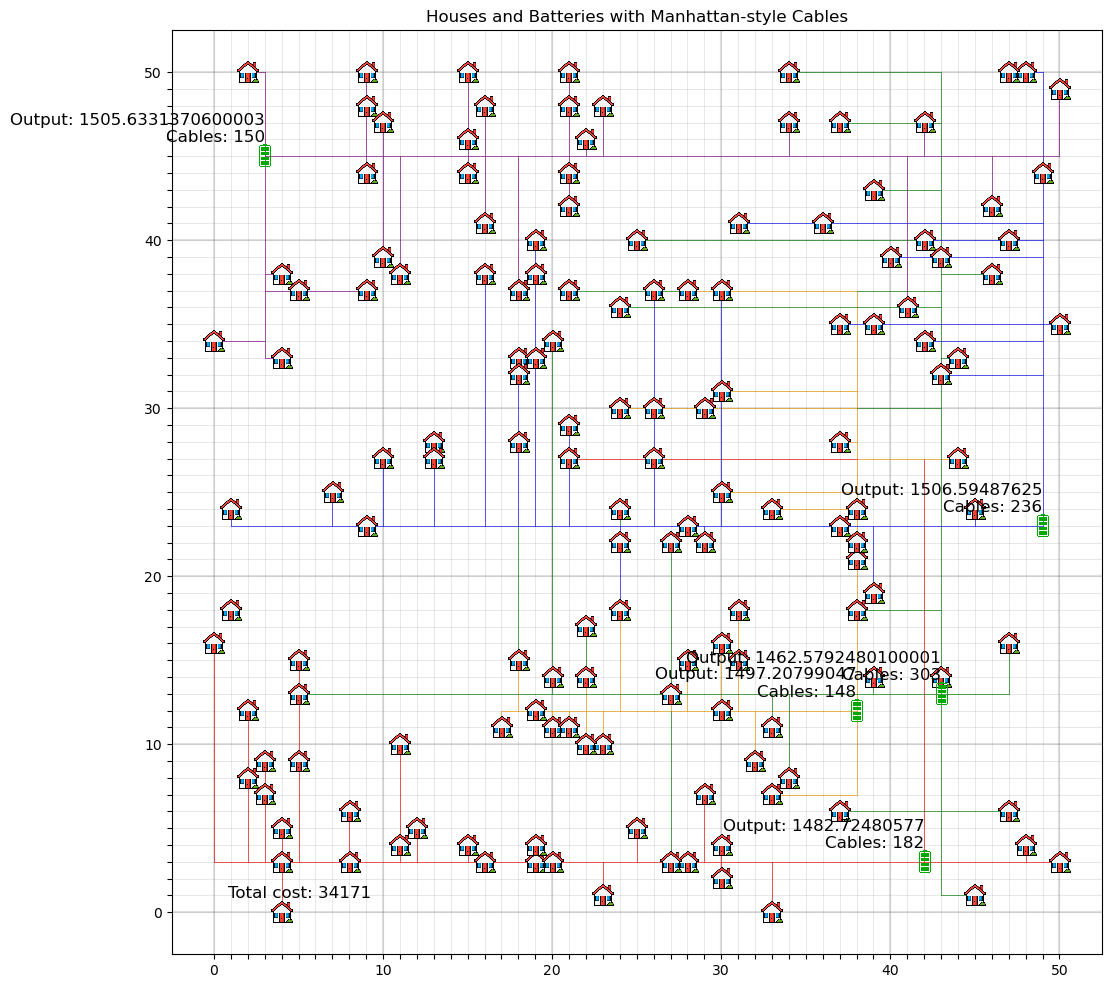

In [1]:
from code.classes.district import District
from code.helpers.visualize import visualize
from code.algorithm.nearest_battery import nearest_battery
from code.algorithm.dijckstra import dijckstra
from code.algorithm.random_alg import RandomAlgorithm
from code.algorithm.nearest_object_x import nearest_object_x
from code.algorithm.nearest_object_y import nearest_object_y
from code.algorithm.nearest_object_rand import nearest_object_rand

## DISTRICT 1 ##

batteries_file = 'data/Huizen&Batterijen/district_1/district-1_batteries.csv'


### RANDOM ALGORITM BEST RESULTS##

print("RANDOM ALGORITM BEST RESULTS")
houses_file = 'simulation_results/District 1 random_algorithm_lowest_cost_order.csv'

district = District(houses_file, batteries_file)

# Apply the Greedy algorithm to connect houses to batteries
random_alg = RandomAlgorithm(district)
random_alg.connect_houses_to_batteries()

visualize(district, 1)

##NEAREST BATTERY BEST RESULTS##
print("NEAREST BATTERY BEST RESULTS")
houses_file = 'simulation_results/District 1 nearest_battery_lowest_cost_order.csv'

district = District(houses_file, batteries_file)

# Apply the Greedy algorithm to connect houses to batteries
nearest_battery = nearest_battery(district)
nearest_battery.connect_houses_to_batteries()

visualize(district, 1)


##NEAREST OBJECT X BEST RESULTS##
print("NEAREST OBJECT X BEST RESULTS")
houses_file = 'simulation_results/District 1 nearest_object_x_lowest_cost_order.csv'

district = District(houses_file, batteries_file)

# Apply the Greedy algorithm to connect houses to batteries
nearest_x = nearest_object_x(district)
nearest_x.connect_houses_to_batteries()

visualize(district, 1)


##NEAREST OBJECT Y BEST RESULTS##
print("NEAREST OBJECT Y BEST RESULTS")
houses_file = 'simulation_results/District 1 nearest_object_y_lowest_cost_order.csv'

district = District(houses_file, batteries_file)

# Apply the Greedy algorithm to connect houses to batteries
nearest_y = nearest_object_y(district)
nearest_y.connect_houses_to_batteries()

visualize(district, 1)


#NEAREST OBJECT RAND BEST RESULTS##
print("NEAREST OBJECT RAND BEST RESULTS")
houses_file = 'simulation_results/District 1 nearest_object_rand_lowest_cost_order.csv'

district = District(houses_file, batteries_file)

# Apply the Greedy algorithm to connect houses to batteries
nearest_rand = nearest_object_rand(district)
nearest_rand.connect_houses_to_batteries()

visualize(district, 1)

##DIJCKSTRA BEST RESULTS##
print("DIJCKSTRA BEST RESULTS")
houses_file = 'simulation_results/District 1 dijckstra_lowest_cost_order.csv'


district = District(houses_file, batteries_file)

# Apply the Greedy algorithm to connect houses to batteries
dijckstra = dijckstra(district)
dijckstra.connect_houses_to_batteries()

visualize(district, 1)
# draw_cables(district)

RANDOM ALGORITM BEST RESULTS
NEAREST BATTERY BEST RESULTS
NEAREST OBJECT X BEST RESULTS
NEAREST OBJECT Y BEST RESULTS
NEAREST OBJECT RAND BEST RESULTS
DIJCKSTRA BEST RESULTS


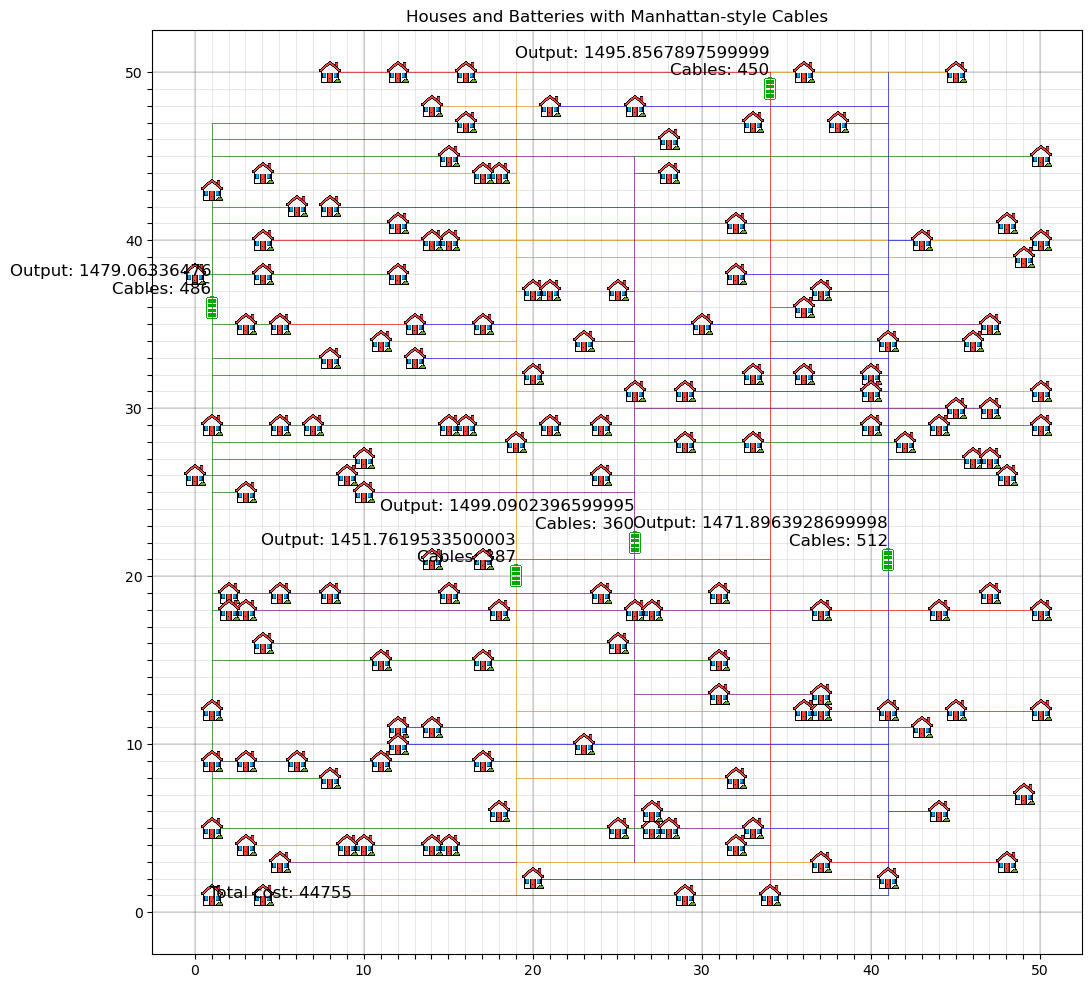

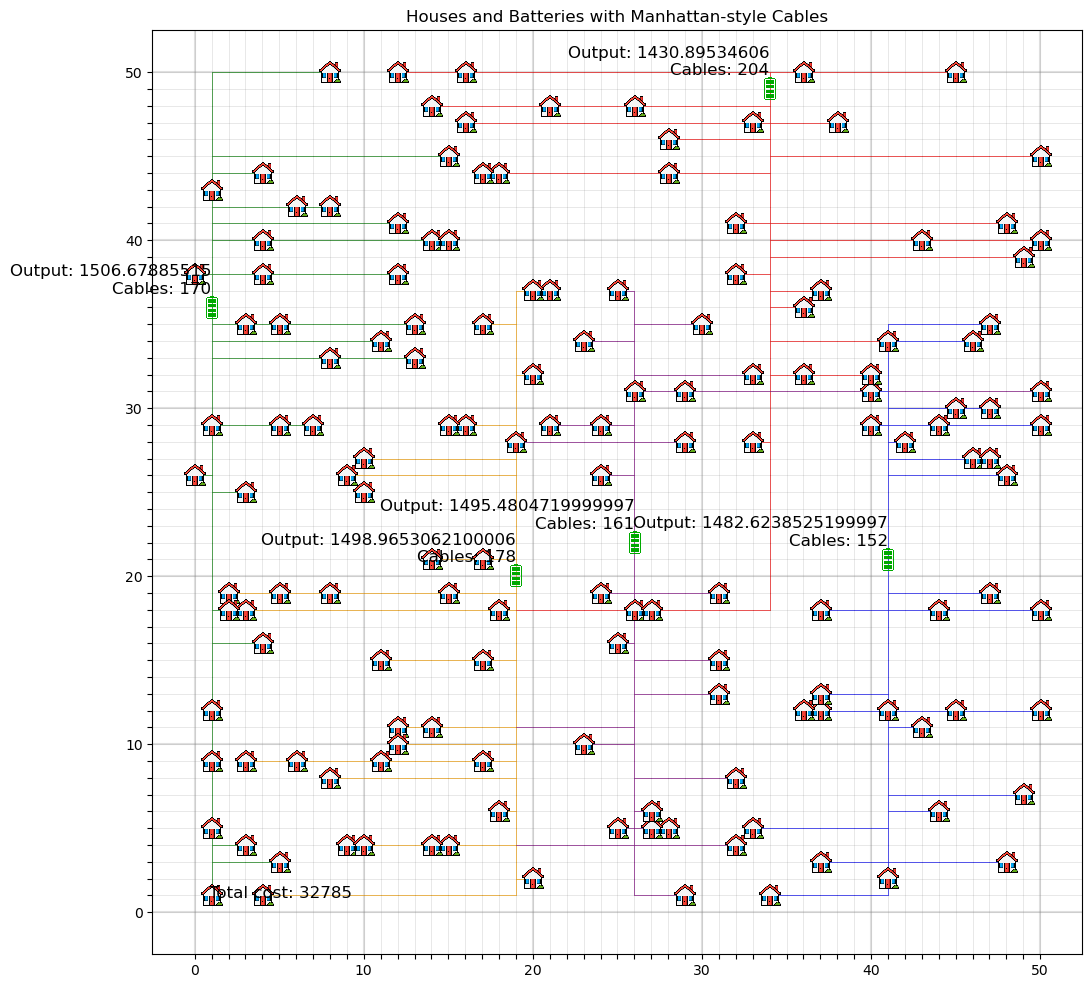

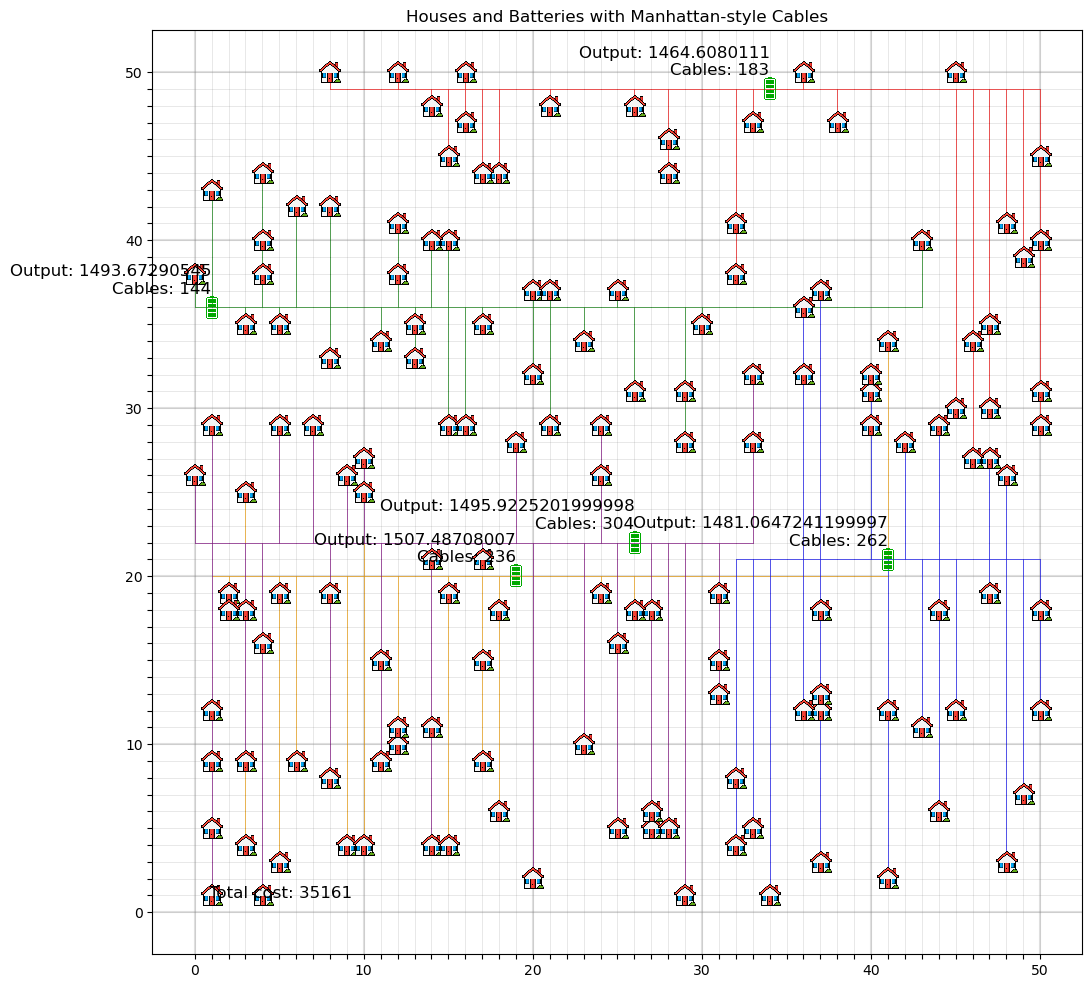

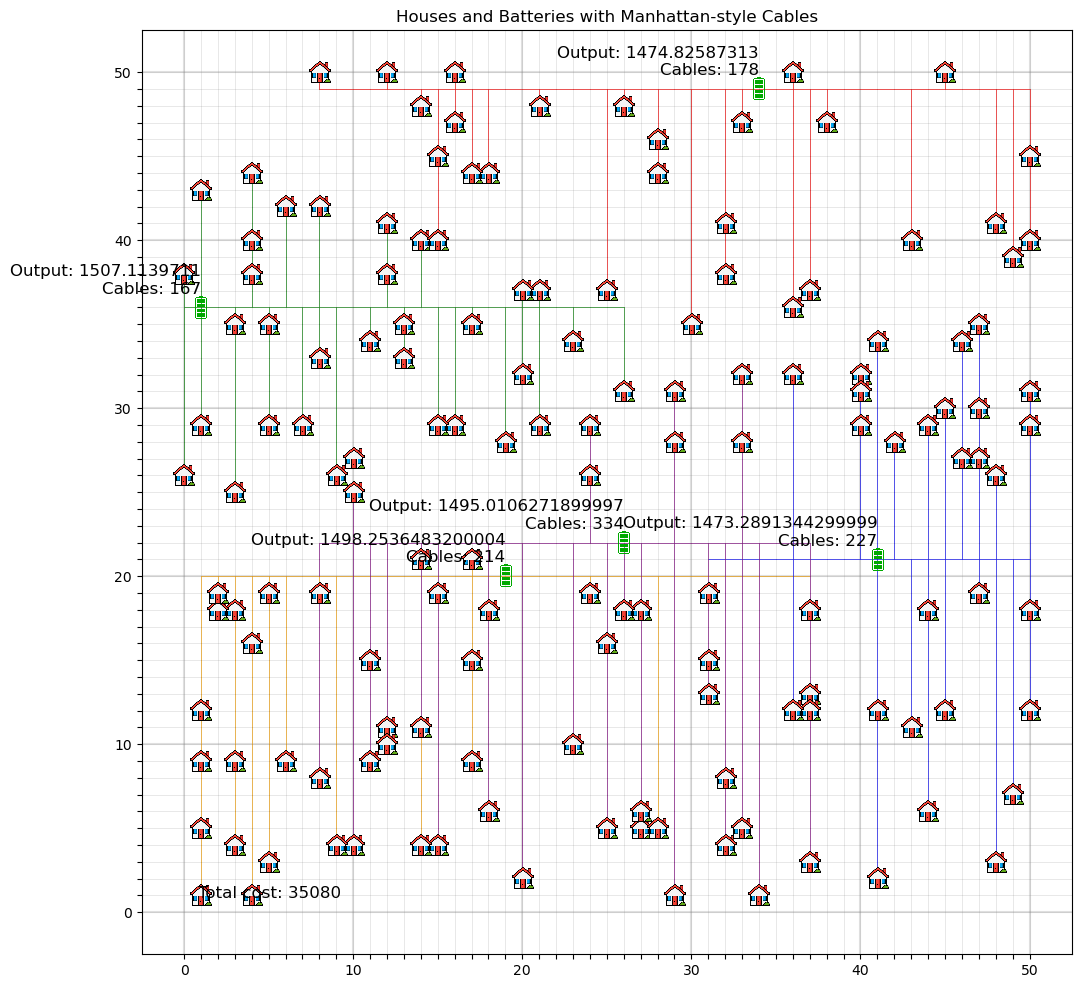

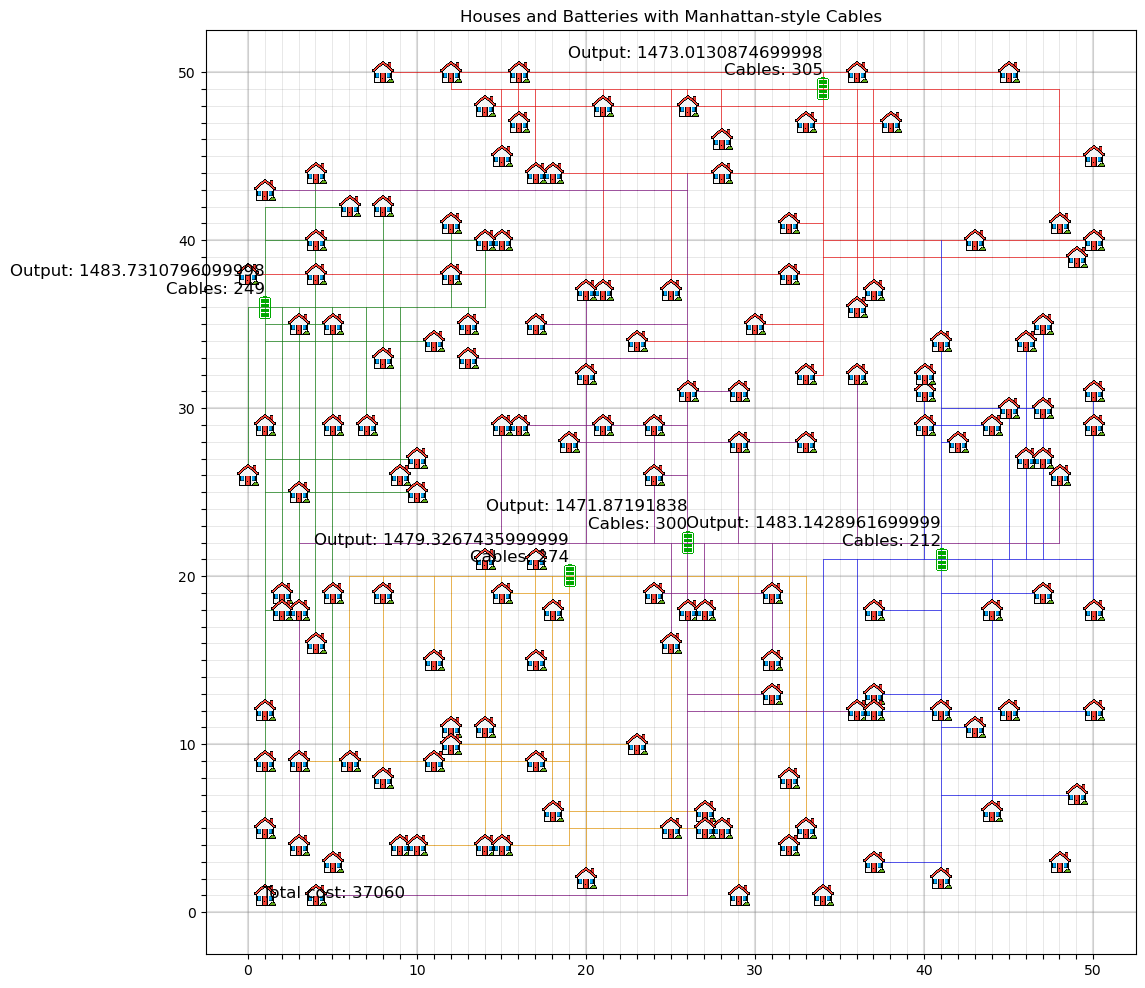

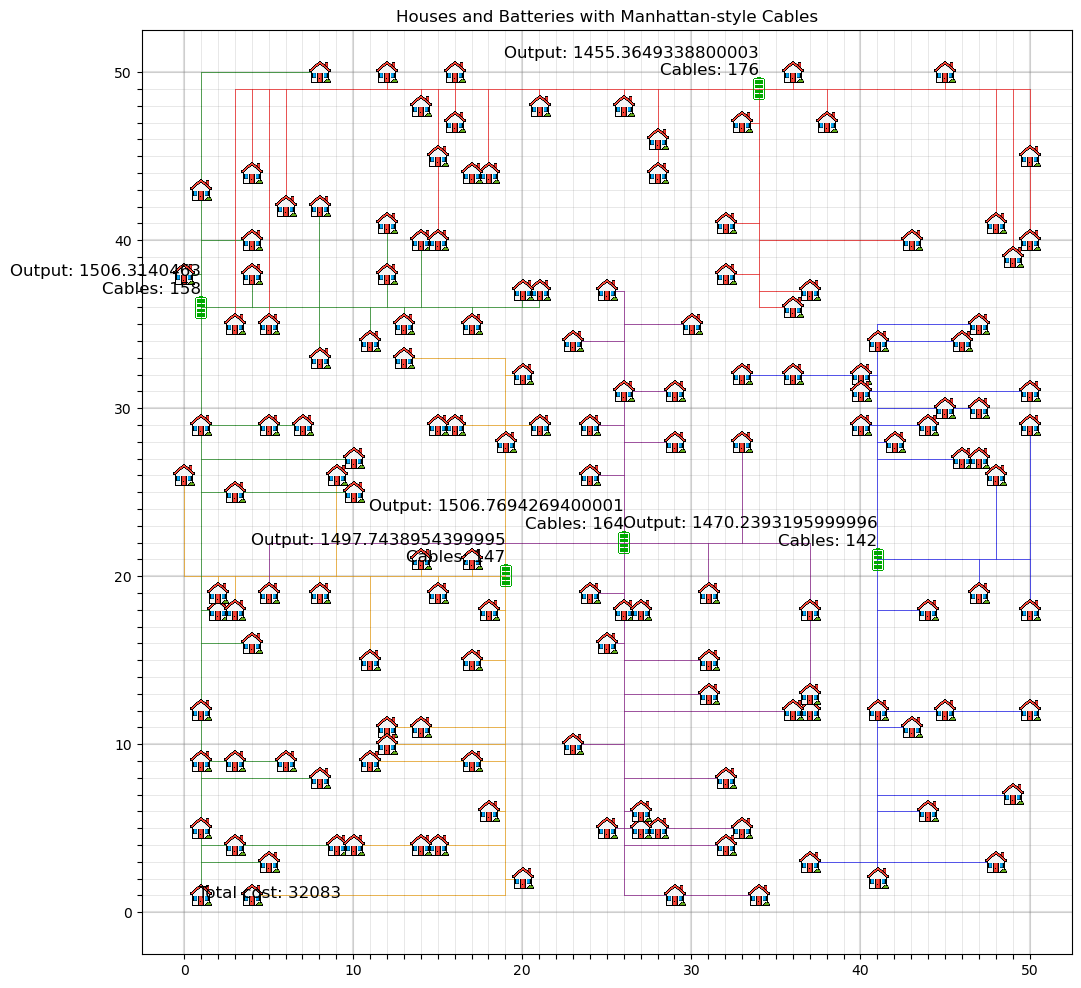

In [2]:
from code.classes.district import District
from code.helpers.visualize import visualize
from code.algorithm.nearest_battery import nearest_battery
from code.algorithm.dijckstra import dijckstra
from code.algorithm.random_alg import RandomAlgorithm
from code.algorithm.nearest_object_x import nearest_object_x
from code.algorithm.nearest_object_y import nearest_object_y
from code.algorithm.nearest_object_rand import nearest_object_rand

## DISTRICT 2 ##

batteries_file = 'data/Huizen&Batterijen/district_2/district-2_batteries.csv'


### RANDOM ALGORITM BEST RESULTS##

print("RANDOM ALGORITM BEST RESULTS")
houses_file = 'simulation_results/District 2 random_algorithm_lowest_cost_order.csv'

district = District(houses_file, batteries_file)

# Apply the Greedy algorithm to connect houses to batteries
random_alg = RandomAlgorithm(district)
random_alg.connect_houses_to_batteries()

visualize(district, 1)

##NEAREST BATTERY BEST RESULTS##
print("NEAREST BATTERY BEST RESULTS")
houses_file = 'simulation_results/District 2 nearest_battery_lowest_cost_order.csv'

district = District(houses_file, batteries_file)

# Apply the Greedy algorithm to connect houses to batteries
nearest_battery = nearest_battery(district)
nearest_battery.connect_houses_to_batteries()

visualize(district, 1)


##NEAREST OBJECT X BEST RESULTS##
print("NEAREST OBJECT X BEST RESULTS")
houses_file = 'simulation_results/District 2 nearest_object_x_lowest_cost_order.csv'

district = District(houses_file, batteries_file)

# Apply the Greedy algorithm to connect houses to batteries
nearest_x = nearest_object_x(district)
nearest_x.connect_houses_to_batteries()

visualize(district, 1)


##NEAREST OBJECT Y BEST RESULTS##
print("NEAREST OBJECT Y BEST RESULTS")
houses_file = 'simulation_results/District 2 nearest_object_y_lowest_cost_order.csv'

district = District(houses_file, batteries_file)

# Apply the Greedy algorithm to connect houses to batteries
nearest_y = nearest_object_y(district)
nearest_y.connect_houses_to_batteries()

visualize(district, 1)


#NEAREST OBJECT RAND BEST RESULTS##
print("NEAREST OBJECT RAND BEST RESULTS")
houses_file = 'simulation_results/District 2 nearest_object_rand_lowest_cost_order.csv'

district = District(houses_file, batteries_file)

# Apply the Greedy algorithm to connect houses to batteries
nearest_rand = nearest_object_rand(district)
nearest_rand.connect_houses_to_batteries()

visualize(district, 1)


##DIJCKSTRA BEST RESULTS##
print("DIJCKSTRA BEST RESULTS")
houses_file = 'simulation_results/District 2 dijckstra_lowest_cost_order.csv'


district = District(houses_file, batteries_file)

# Apply the Greedy algorithm to connect houses to batteries
dijckstra = dijckstra(district)
dijckstra.connect_houses_to_batteries()

visualize(district, 1)
# draw_cables(district)

RANDOM ALGORITM BEST RESULTS
NEAREST BATTERY BEST RESULTS
NEAREST OBJECT X BEST RESULTS
NEAREST OBJECT Y BEST RESULTS
NEAREST OBJECT RAND BEST RESULTS
DIJCKSTRA BEST RESULTS


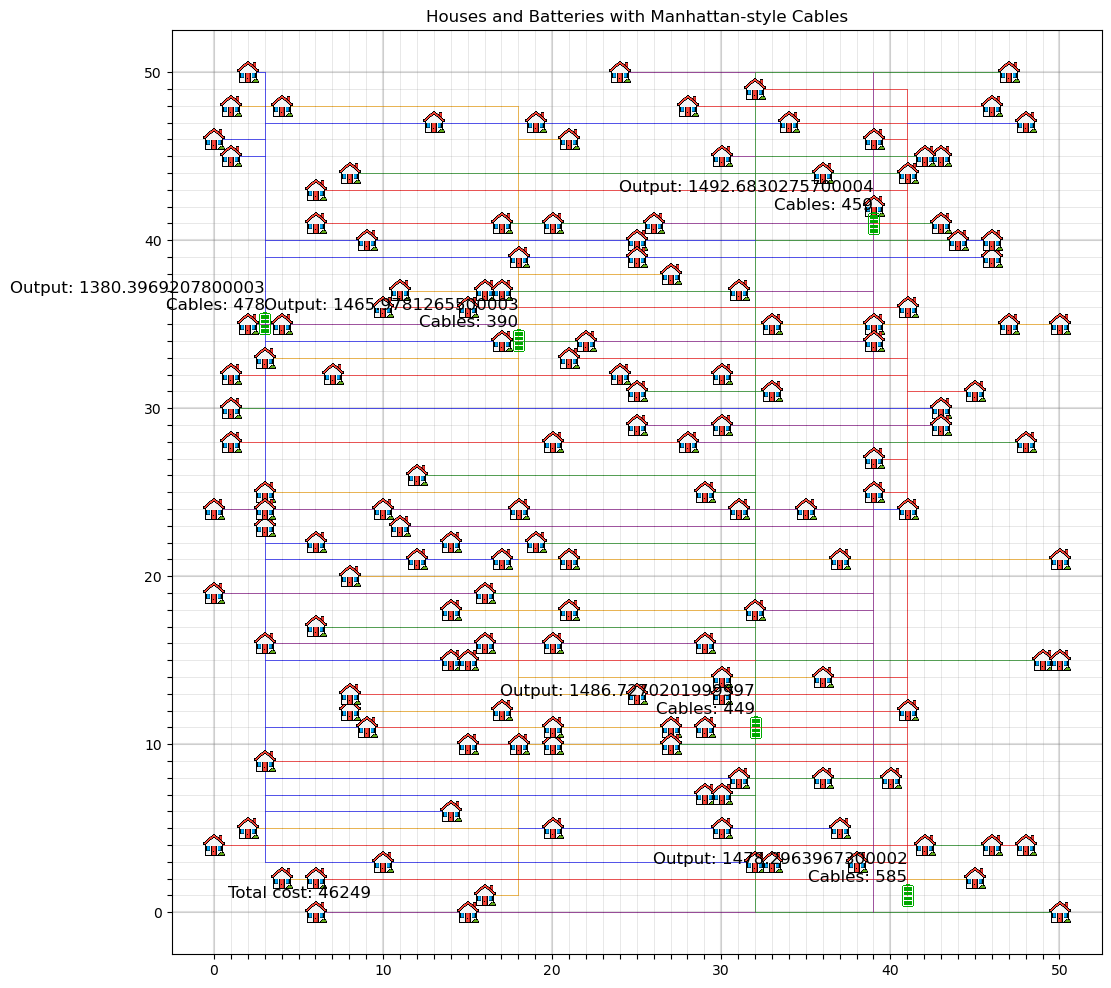

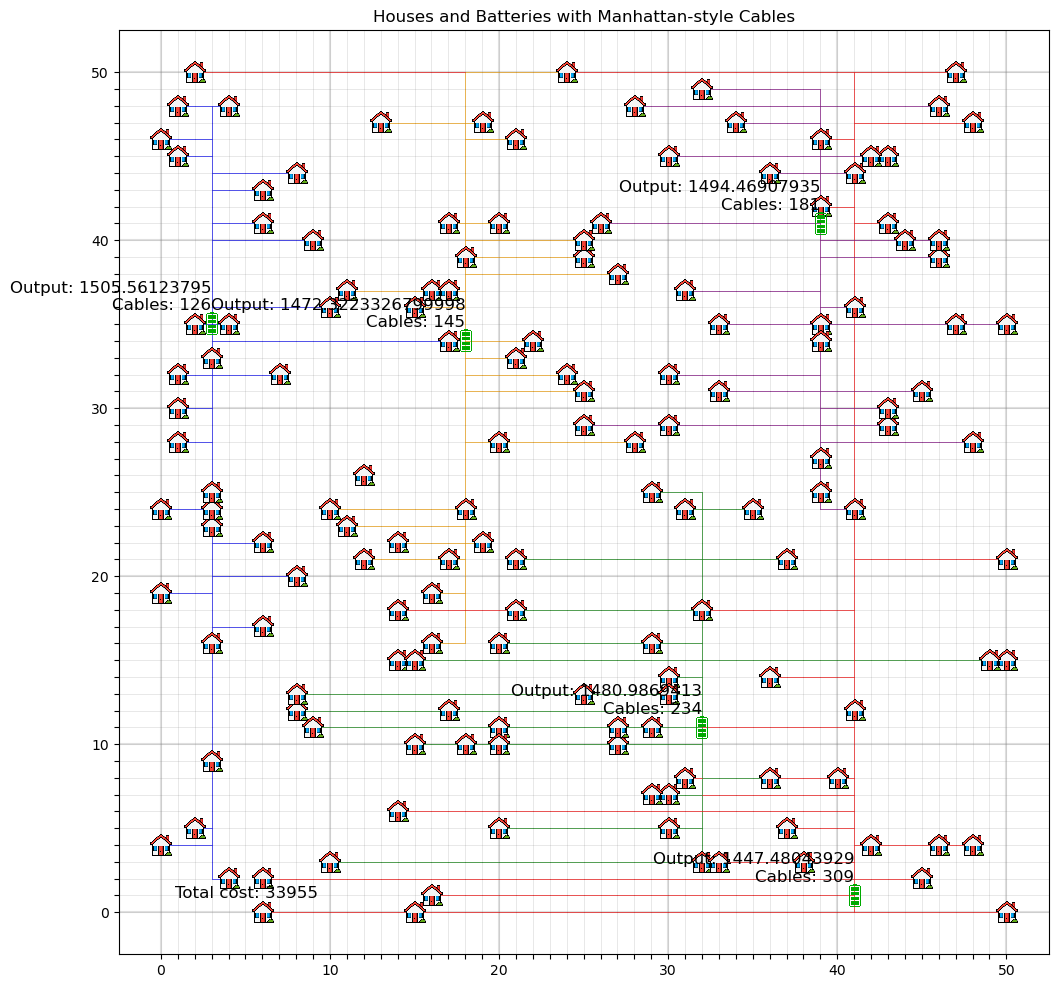

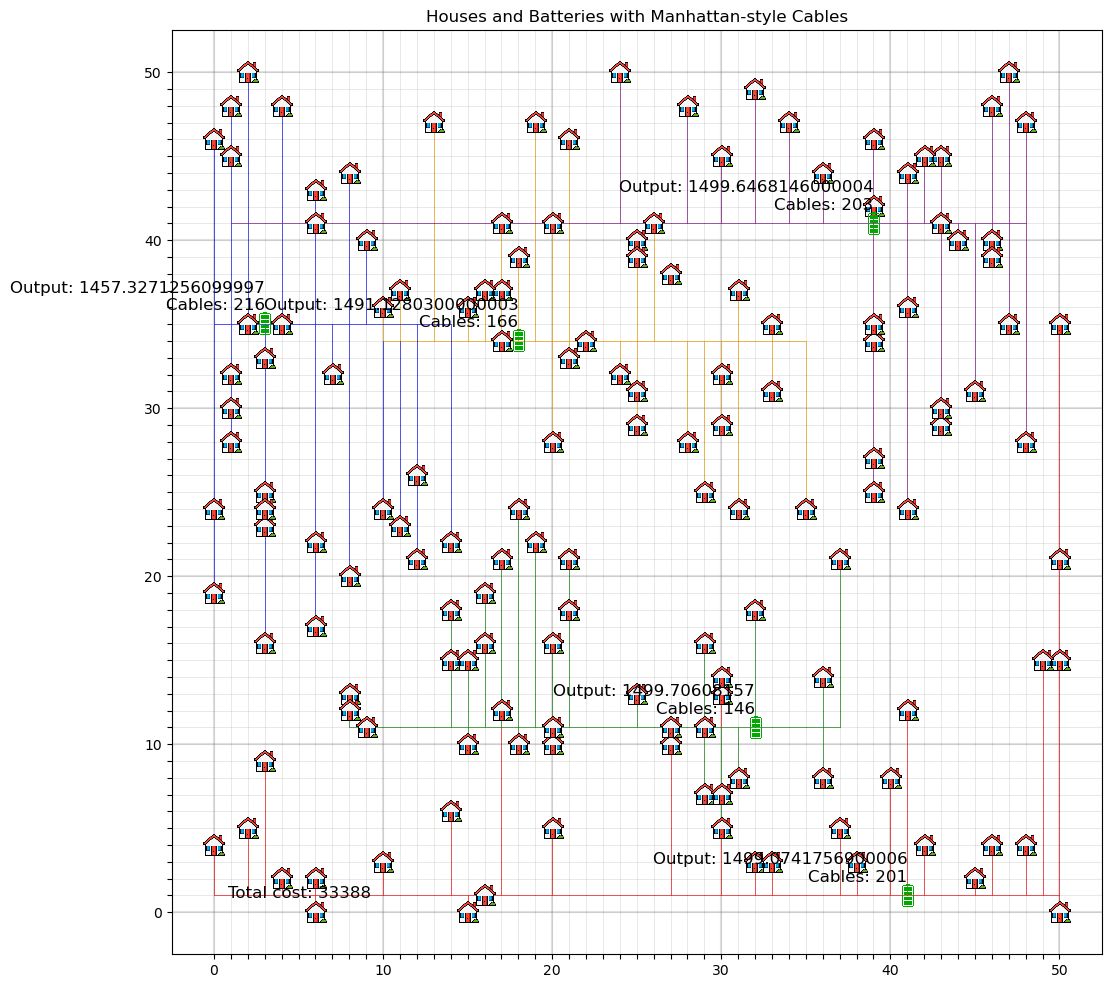

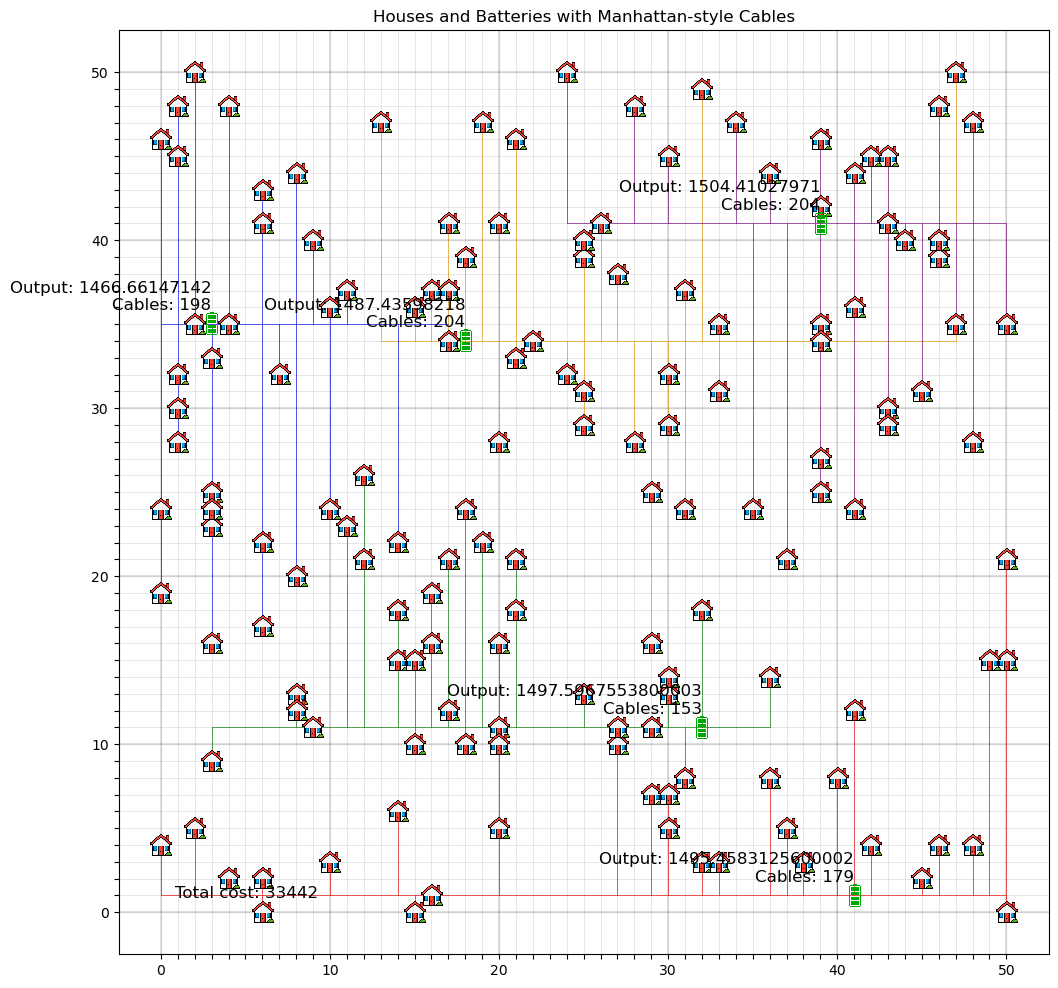

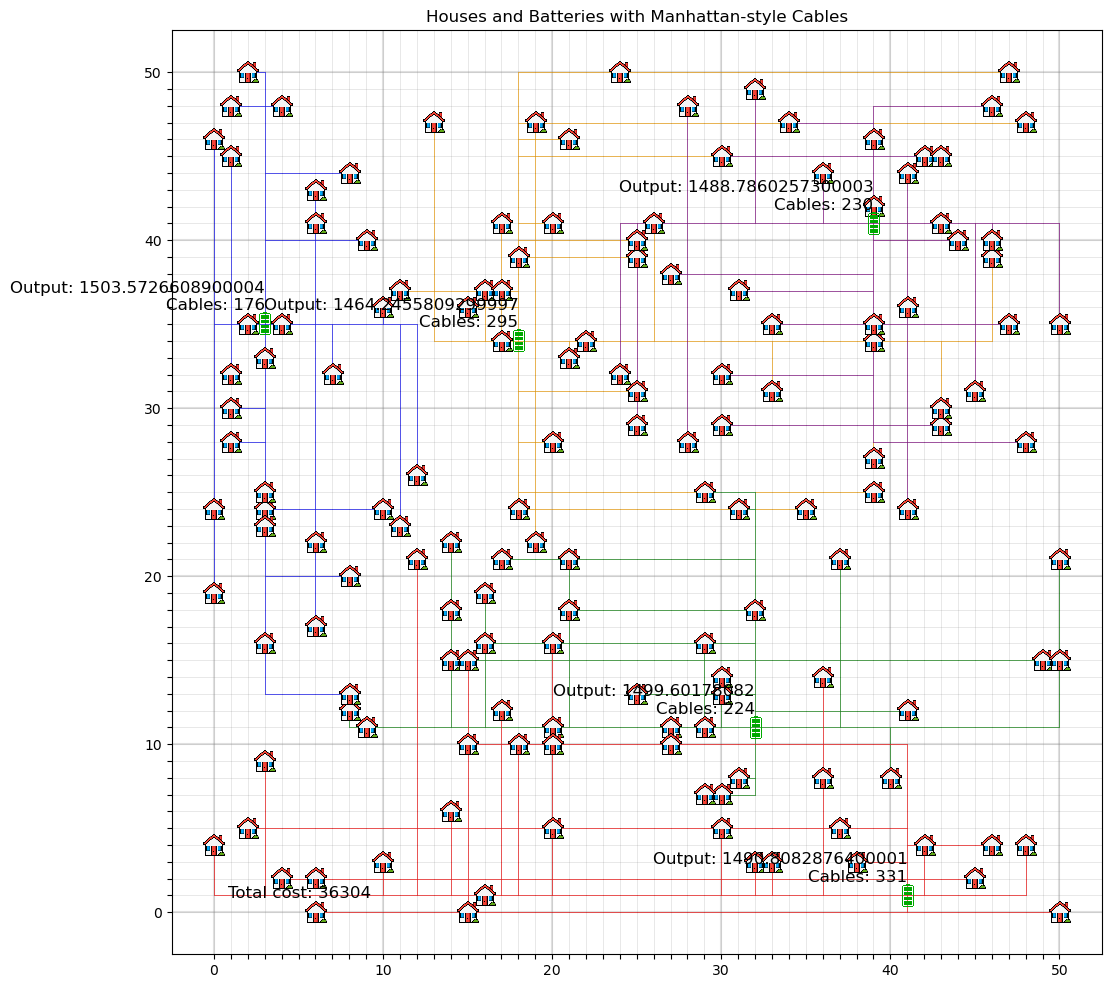

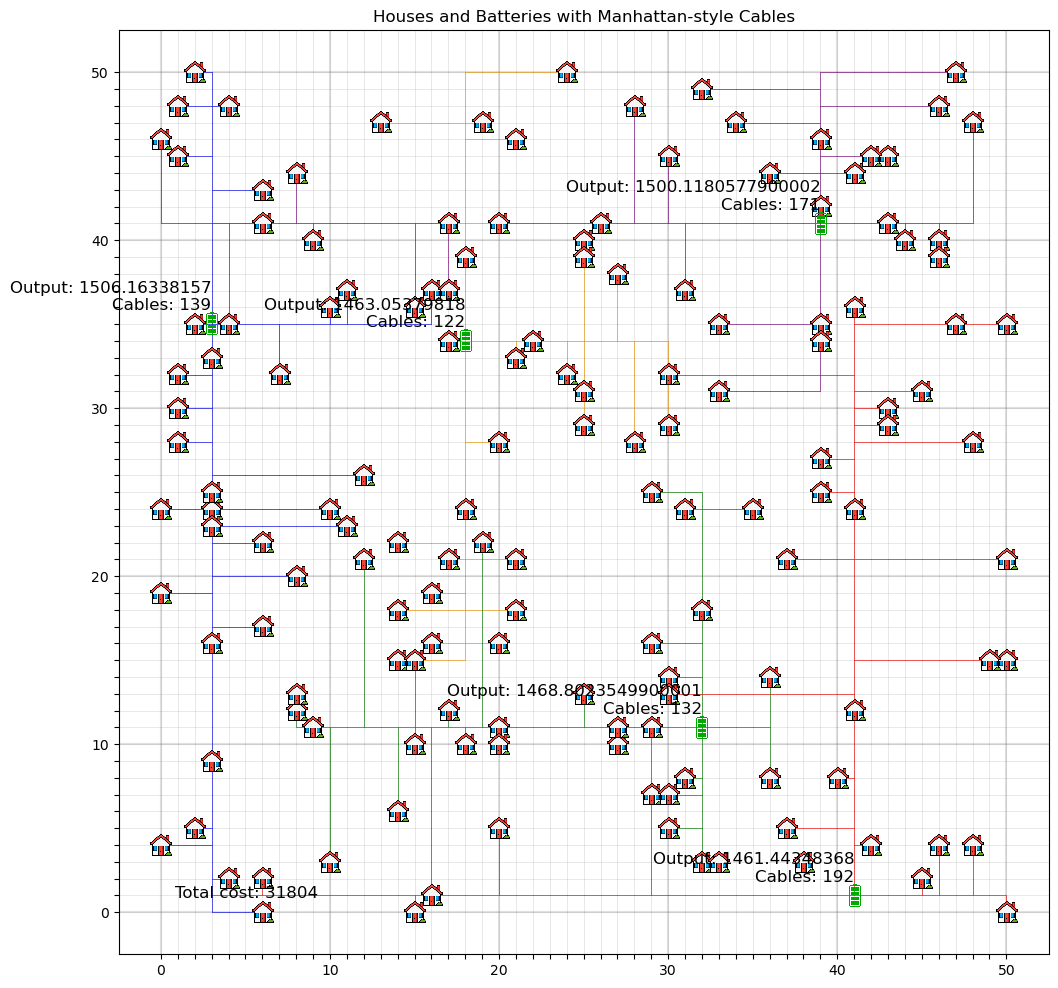

In [3]:
from code.classes.district import District
from code.helpers.visualize import visualize
from code.algorithm.nearest_battery import nearest_battery
from code.algorithm.dijckstra import dijckstra
from code.algorithm.random_alg import RandomAlgorithm
from code.algorithm.nearest_object_x import nearest_object_x
from code.algorithm.nearest_object_y import nearest_object_y
from code.algorithm.nearest_object_rand import nearest_object_rand

## DISTRICT 3 ##

batteries_file = 'data/Huizen&Batterijen/district_3/district-3_batteries.csv'


### RANDOM ALGORITM BEST RESULTS##

print("RANDOM ALGORITM BEST RESULTS")
houses_file = 'simulation_results/District 3 random_algorithm_lowest_cost_order.csv'

district = District(houses_file, batteries_file)

# Apply the Greedy algorithm to connect houses to batteries
random_alg = RandomAlgorithm(district)
random_alg.connect_houses_to_batteries()

visualize(district, 1)

##NEAREST BATTERY BEST RESULTS##
print("NEAREST BATTERY BEST RESULTS")
houses_file = 'simulation_results/District 3 nearest_battery_lowest_cost_order.csv'

district = District(houses_file, batteries_file)

# Apply the Greedy algorithm to connect houses to batteries
nearest_battery = nearest_battery(district)
nearest_battery.connect_houses_to_batteries()

visualize(district, 1)

##NEAREST OBJECT X BEST RESULTS##
print("NEAREST OBJECT X BEST RESULTS")
houses_file = 'simulation_results/District 3 nearest_object_x_lowest_cost_order.csv'

district = District(houses_file, batteries_file)

# Apply the Greedy algorithm to connect houses to batteries
nearest_x = nearest_object_x(district)
nearest_x.connect_houses_to_batteries()

visualize(district, 1)


##NEAREST OBJECT Y BEST RESULTS##
print("NEAREST OBJECT Y BEST RESULTS")
houses_file = 'simulation_results/District 3 nearest_object_y_lowest_cost_order.csv'

district = District(houses_file, batteries_file)

# Apply the Greedy algorithm to connect houses to batteries
nearest_y = nearest_object_y(district)
nearest_y.connect_houses_to_batteries()

visualize(district, 1)



#NEAREST OBJECT RAND BEST RESULTS##
print("NEAREST OBJECT RAND BEST RESULTS")
houses_file = 'simulation_results/District 3 nearest_object_rand_lowest_cost_order.csv'

district = District(houses_file, batteries_file)

# Apply the Greedy algorithm to connect houses to batteries
nearest_rand = nearest_object_rand(district)
nearest_rand.connect_houses_to_batteries()

visualize(district, 1)


##DIJCKSTRA BEST RESULTS##
print("DIJCKSTRA BEST RESULTS")
houses_file = 'simulation_results/District 3 dijckstra_lowest_cost_order.csv'


district = District(houses_file, batteries_file)

# Apply the Greedy algorithm to connect houses to batteries
dijckstra = dijckstra(district)
dijckstra.connect_houses_to_batteries()

visualize(district, 1)
# draw_cables(district)

In [4]:
from code.algorithm.dijckstra import dijckstra as dijckstra_algo
from code.algorithm.dijckstra import dijckstra_sum as dijckstra_sum_algo
from code.algorithm.dijckstra import dijckstra_max as dijckstra_max_algo
from code.classes.district import District
from code.helpers.visualize import visualize

houses_file = 'simulation_results/dijckstra_lowest_cost_order.csv'
batteries_file = 'data/Huizen&Batterijen/district_1/district-1_batteries.csv'

# DIJCKSTRA
district = District(houses_file, batteries_file)

# Apply the Greedy algorithm to connect houses to batteries
dijckstra = dijckstra_algo(district)
dijckstra.connect_houses_to_batteries()
visualize(district, 1)



# DIJCKSTRA SUM
houses_file = 'simulation_results/dijckstra_sum_lowest_cost_order.csv'

district = District(houses_file, batteries_file)

# Apply the Greedy algorithm to connect houses to batteries
dijckstra = dijckstra_sum_algo(district)
dijckstra.connect_houses_to_batteries()
visualize(district, 1)




# DIJCKSTRA MAX
houses_file = 'simulation_results/dijckstra_max_lowest_cost_order.csv'

district = District(houses_file, batteries_file)

# Apply the Greedy algorithm to connect houses to batteries
dijckstra = dijckstra_max_algo(district)
dijckstra.connect_houses_to_batteries()
visualize(district, 1)


FileNotFoundError: [Errno 2] No such file or directory: 'simulation_results/dijckstra_lowest_cost_order.csv'